Market Segmentation for an Electric Vehicle Startup

This study aims to analyze the EV market in India through segmentation analysis, focusing on various factors such as vehicle type, geographic distribution, and consumer demographics.

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import Counter
from itertools import product
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
# fetching EV Customer preference- dataset1
df = pd.read_csv('EV_Customer_preferences.csv')

In [4]:
df.head()

Age       City Profession Marital Status Education  No. of Family members  \
0   30      Nabha        NaN         Single  Graduate                      5   
1   27       Pune        NaN         Single  Graduate                      4   
2   32  Kashipur         NaN         Single  Graduate                      4   
3   55       Pune   Business         Single  Graduate                      3   
4   26     Satara        NaN         Single  Graduate                      4   

   Annual Income  \
0    1193875.647   
1    1844540.398   
2    2948150.113   
3    2832379.739   
4    2638750.576   

  Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                              Maybe                     
1                                                Yes                     
2                                                Yes                     
3                                              Maybe                     
4                                                Yes                     

  If Yes/Maybe what type of  EV would you prefer?  \
0                                             SUV   
1                                             SUV   
2                                       Hatchback   
3                                       Hatchback   
4                                           Sedan   

  Do you think Electronic Vehicles are economical?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                               No   
4                                              Yes   

  Which brand of vehicle do you currently own?  \
0                                      Hyundai   
1                                        Honda   
2                                          KIA   
3                                      Hyundai   
4                                     McLaren    

  How much money could you spend on an Electronic vehicle?  \
0                                           <5 lakhs         
1                                          <15 lakhs         
2                                          <15 lakhs         
3                                           <5 lakhs         
4                                          <15 lakhs         

   Preference for wheels in EV  \
0                            2   
1                            4   
2                            4   
3                            4   
4                            4   

  Do you think Electronic vehicles will replace fuel cars in India?  
0                                   I don't think so                 
1                                   Yes, in <20years                 
2                                   Yes, in <20years                 
3                                  Yes, in <10 years                 
4                                   Yes, in <20years

Exploratory Data Analysis (EDA)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   1000 non-null   int64  
 1   City                                                                  1000 non-null   object 
 2   Profession                                                            540 non-null    object 
 3   Marital Status                                                        1000 non-null   object 
 4   Education                                                             1000 non-null   object 
 5   No. of Family members                                                 1000 non-null   int64  
 6   Annual Income                                                         1000 non-null   float64
 7 

In [7]:
print('DF Shape: ', df.shape)

DF Shape:  (1000, 14)


In [8]:
print(df.isna().sum())

Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference for wheels in EV                                               0
Do you think

In [9]:
print(df.nunique())

Age                                                                       58
City                                                                      24
Profession                                                                 3
Marital Status                                                             2
Education                                                                  2
No. of Family members                                                      9
Annual Income                                                           1000
Would you prefer replacing all your vehicles to Electronic vehicles?       3
If Yes/Maybe what type of  EV would you prefer?                            5
Do you think Electronic Vehicles are economical?                           3
Which brand of vehicle do you currently own?                              16
How much money could you spend on an Electronic vehicle?                   8
Preference for wheels in EV                                                3

EDA for EV customer preferences

In [11]:
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])

In [12]:
df.isna().sum()

Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV                                             0
Do you think Electronic vehicles will 

In [13]:
df.rename(columns={'Annual Income':'Annual_Income'},inplace=True) 

In [14]:
df['City'].value_counts()

City
Pune           621
Delhi           57
Mumbai          56
Haldwani        27
Bangalore       23
Nagpur          22
Satara          21
Nellore         17
Nashik          17
Noida           15
Chennai         15
Kashipur        13
Chandrapur      12
Ahmedabad       12
Patiyala         9
Faridabad        9
Rewari           8
Nabha            8
Gurugram         8
Karnal           7
Serampore        7
solapur          6
Jalandhar        6
Jhansi           4
Name: count, dtype: int64

In [15]:
df['Profession'].value_counts()

Profession
Working Professional    796
Business                167
Salaried                 37
Name: count, dtype: int64

In [16]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual_Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

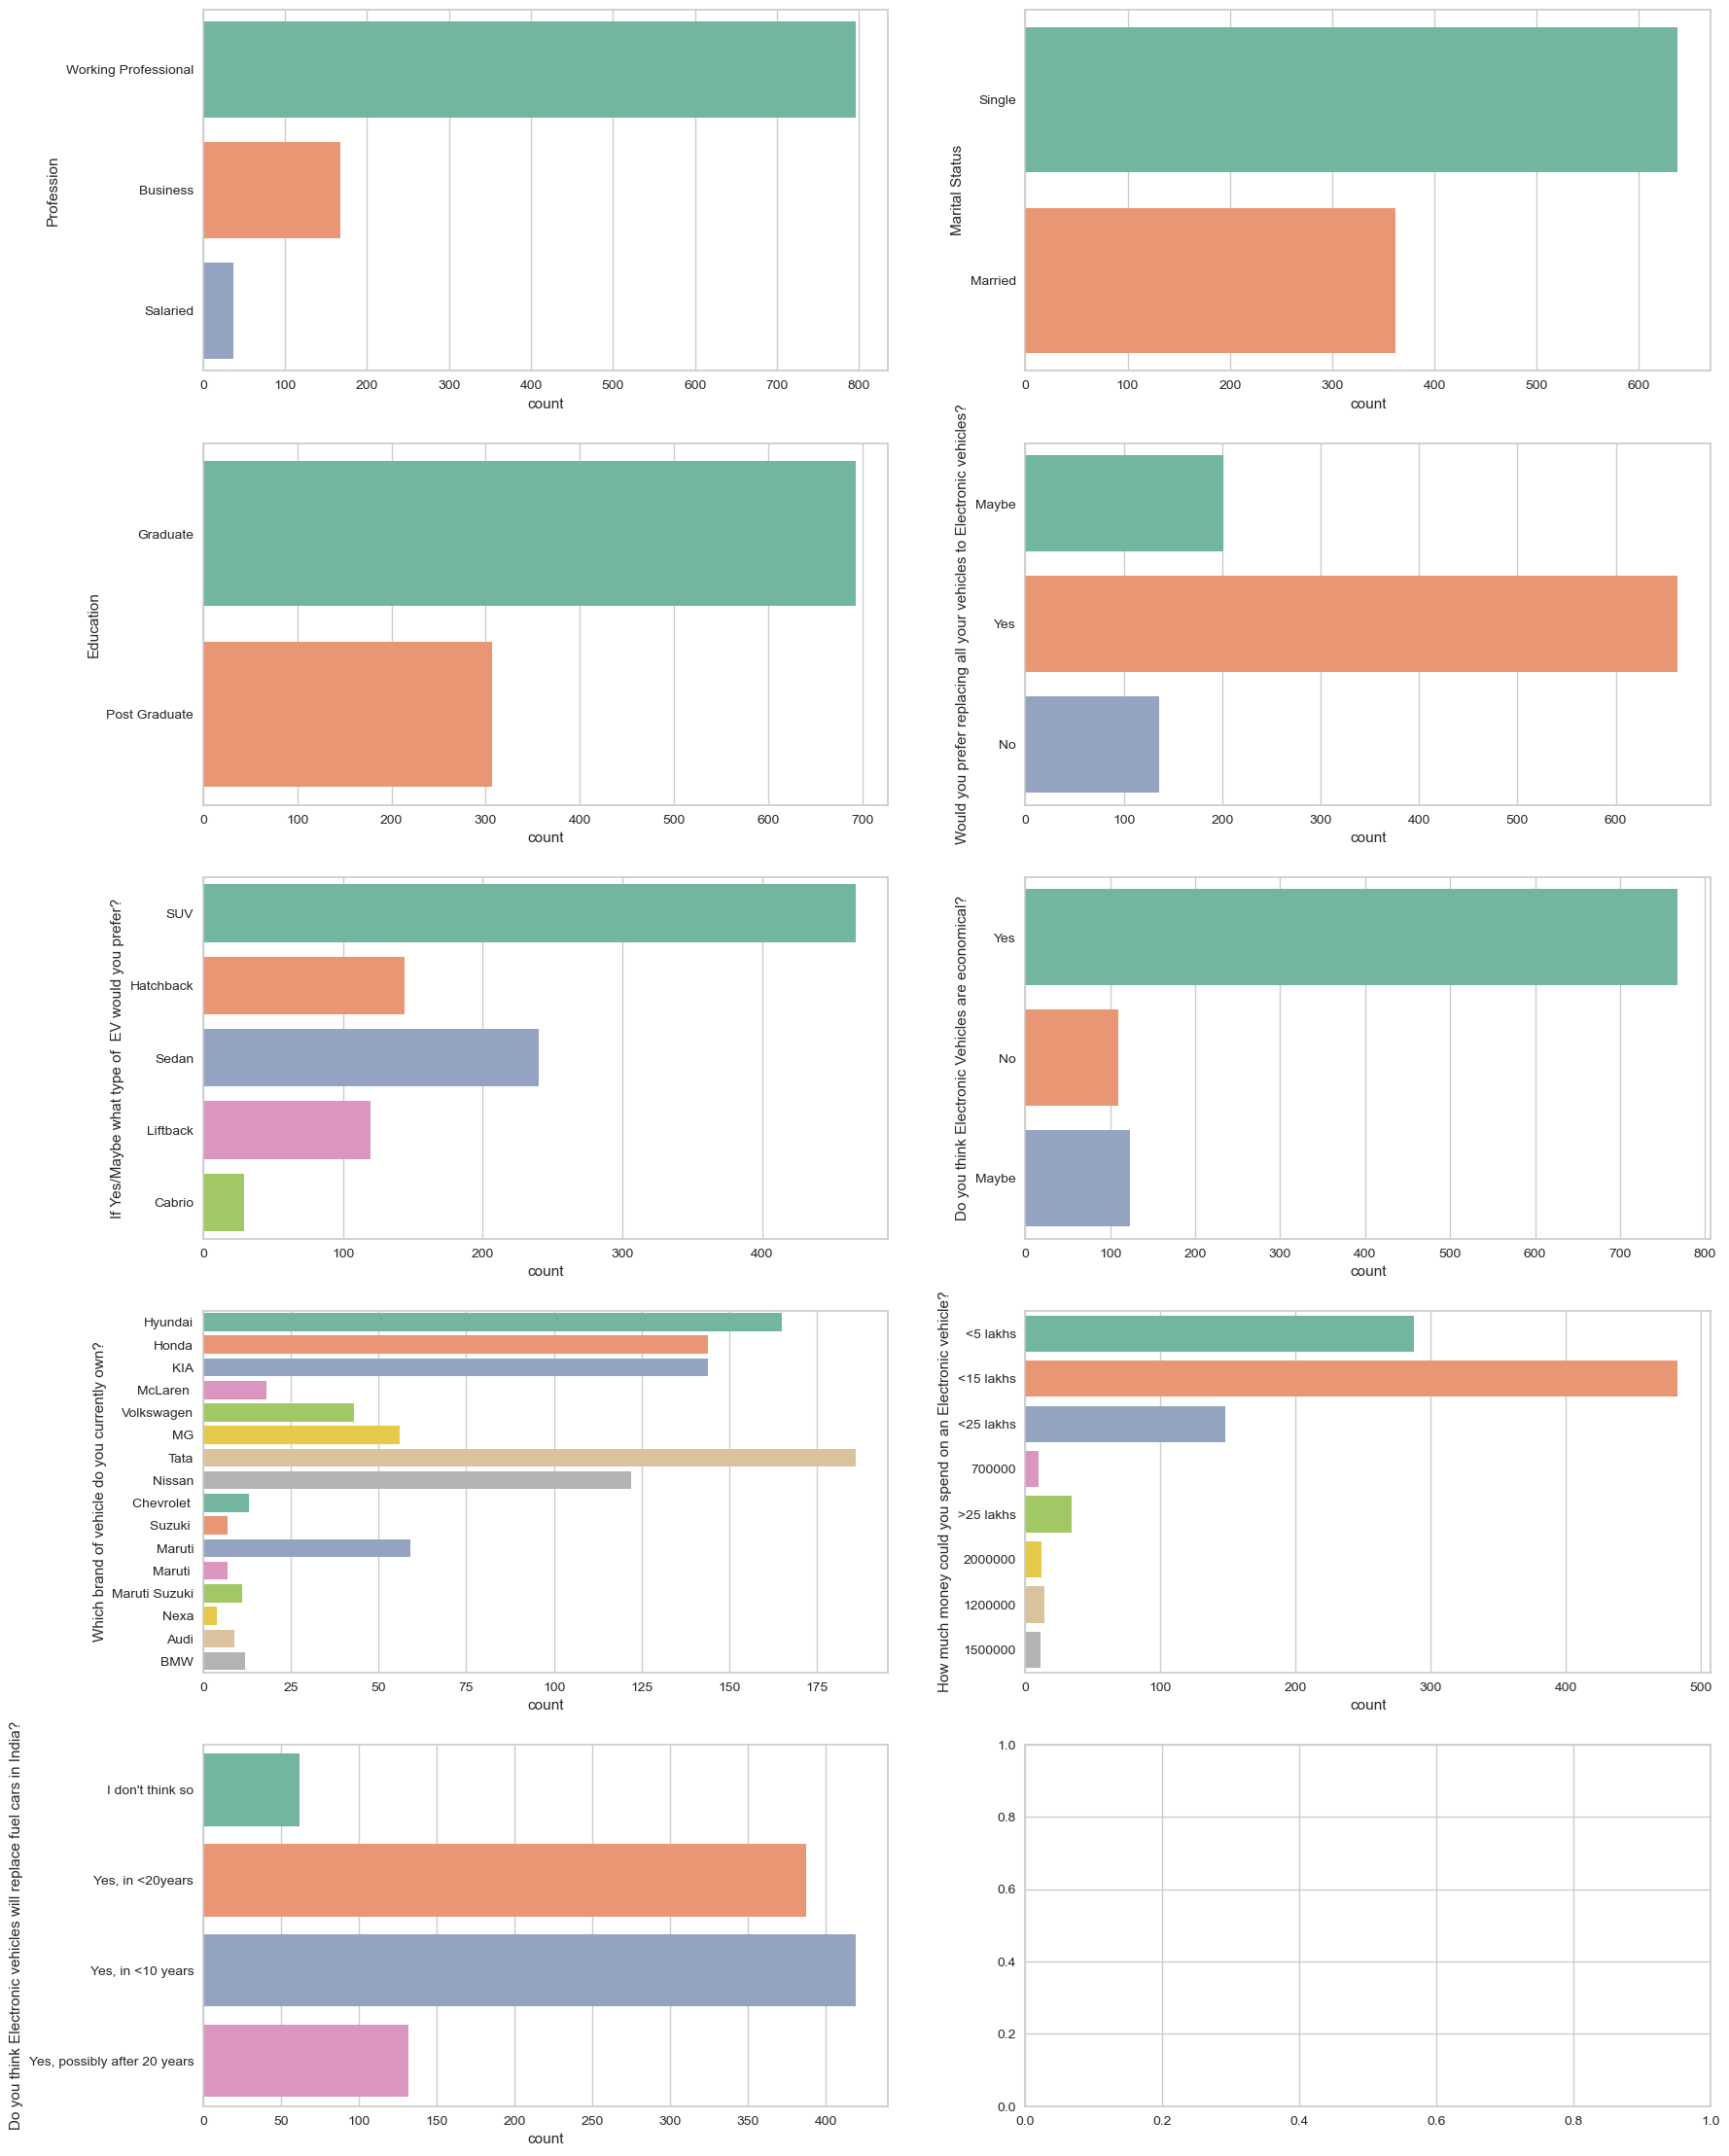

In [17]:
#univariate analysis of categorical variables of Customer preference df
fig, ax = plt.subplots(5, 2, figsize = (20,28))
_=sns.countplot(df['Profession'], ax=ax[0,0], palette='Set2')
_=sns.countplot(df['Marital Status'], ax=ax[0,1], palette='Set2')
_=sns.countplot(df['Education'], ax=ax[1,0], palette='Set2')
_=sns.countplot(df['Would you prefer replacing all your vehicles to Electronic vehicles?'], ax=ax[1,1], palette='Set2')
_=sns.countplot(df['If Yes/Maybe what type of  EV would you prefer?'], ax=ax[2,0], palette='Set2')
_=sns.countplot(df['Do you think Electronic Vehicles are economical?'], ax=ax[2,1], palette='Set2')
_=sns.countplot(df['Which brand of vehicle do you currently own?'], ax=ax[3,0], palette='Set2')
_=sns.countplot(df['How much money could you spend on an Electronic vehicle?'], ax=ax[3,1], palette='Set2')
_=sns.countplot(df['Do you think Electronic vehicles will replace fuel cars in India?'], ax=ax[4,0], palette='Set2')


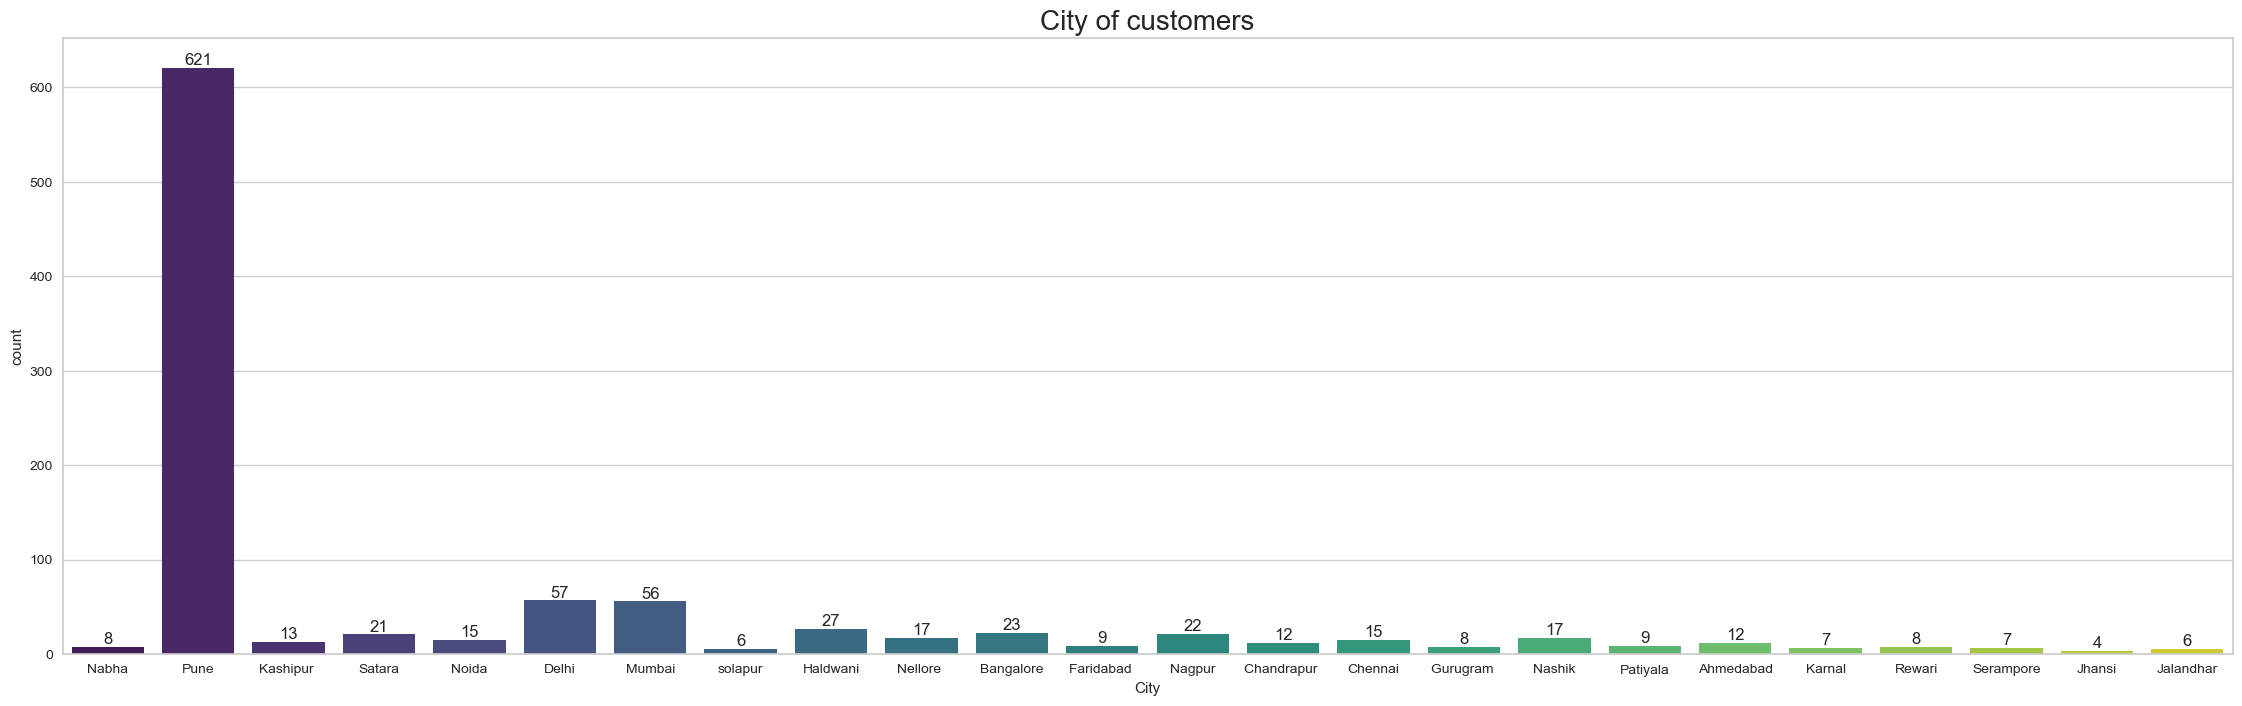

In [18]:
plt.rcParams['figure.figsize'] = (28, 8)
df_city = sns.countplot(x=df['City'], palette = 'viridis')
for container in df_city.containers:
   df_city.bar_label(container)
plt.title('City of customers', fontsize = 20)
plt.show()

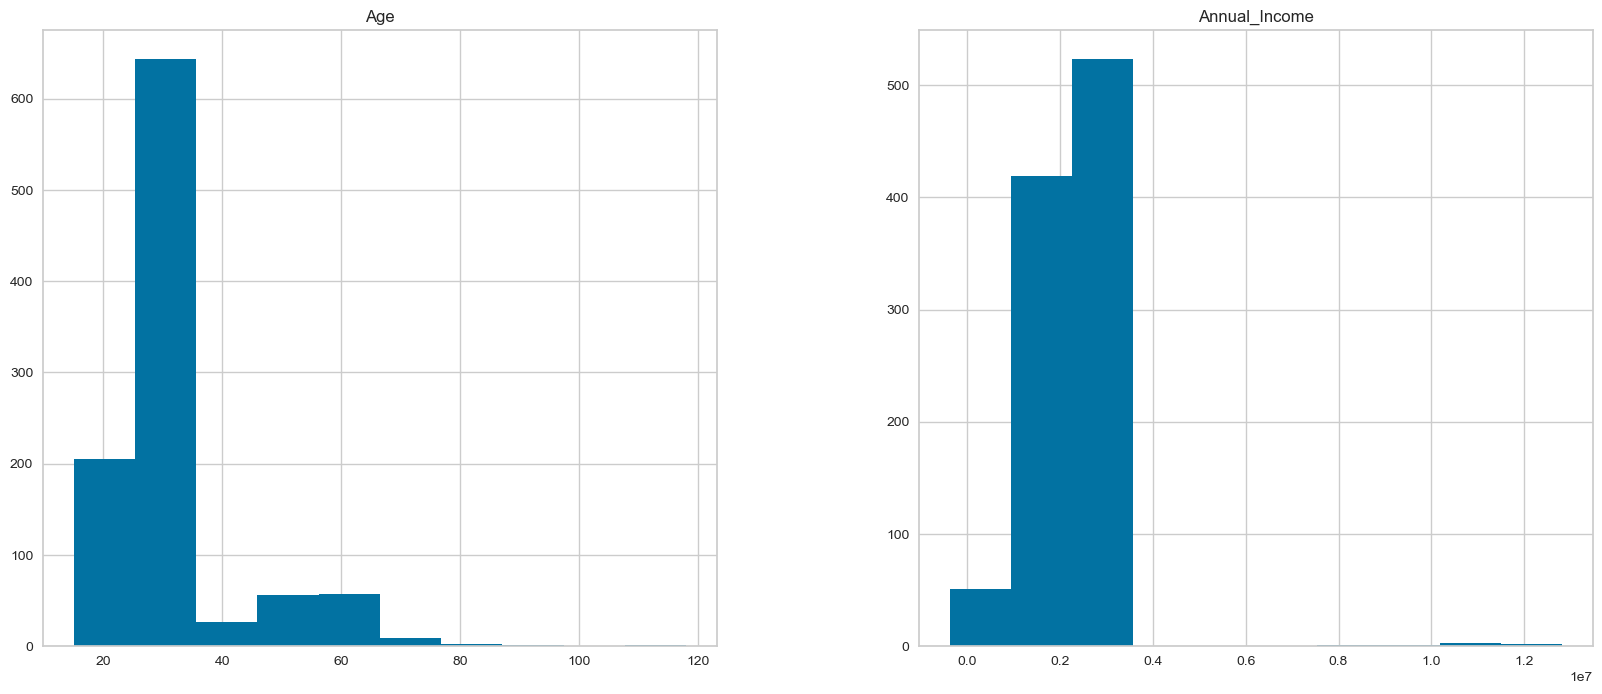

In [19]:
#univariate analysis of numerical columns - continuous variables -Customer preference
df[['Age','Annual_Income']].hist(figsize=(20,8))
plt.show()

In [20]:
df.describe()

Age  No. of Family members  Annual_Income  \
count  1000.000000            1000.000000   1.000000e+03   
mean     31.800000               4.118000   2.258342e+06   
std      11.294847               1.469774   9.993558e+05   
min      15.000000               0.000000  -3.761509e+05   
25%      26.000000               4.000000   1.782116e+06   
50%      29.000000               4.000000   2.329246e+06   
75%      31.000000               5.000000   2.753170e+06   
max     118.000000               8.000000   1.282128e+07   

       Preference for wheels in EV  
count                  1000.000000  
mean                      3.349000  
std                       0.887686  
min                       2.000000  
25%                       2.000000  
50%                       4.000000  
75%                       4.000000  
max                       4.000000

In [21]:
print(f"Duplicates: {df.duplicated().sum()}")
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
# Print the resultant rows
duplicate

Duplicates: 0
Duplicate Rows :


Empty DataFrame
Columns: [Age, City, Profession, Marital Status, Education, No. of Family members, Annual_Income, Would you prefer replacing all your vehicles to Electronic vehicles?, If Yes/Maybe what type of  EV would you prefer?, Do you think Electronic Vehicles are economical?, Which brand of vehicle do you currently own?, How much money could you spend on an Electronic vehicle?, Preference for wheels in EV, Do you think Electronic vehicles will replace fuel cars in India?]
Index: []

In [22]:
#Replace the null values
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [23]:
df.isna().sum()

Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual_Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV                                             0
Do you think Electronic vehicles will 

In [24]:
df.Profession.value_counts()

Profession
Working Professional    796
Business                167
Salaried                 37
Name: count, dtype: int64

In [25]:
df['If Yes/Maybe what type of  EV would you prefer?'].value_counts()

If Yes/Maybe what type of  EV would you prefer?
SUV          467
Sedan        240
Hatchback    144
Liftback     120
Cabrio        29
Name: count, dtype: int64

In [26]:
df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Would you prefer replacing all your vehicles to Electronic vehicles?
Yes      663
Maybe    201
No       136
Name: count, dtype: int64

In [27]:
df['Do you think Electronic Vehicles are economical?'].value_counts()

Do you think Electronic Vehicles are economical?
Yes      768
Maybe    123
No       109
Name: count, dtype: int64

In [28]:
df['Preference for wheels in EV'].value_counts()

Preference for wheels in EV
4    629
2    280
3     91
Name: count, dtype: int64

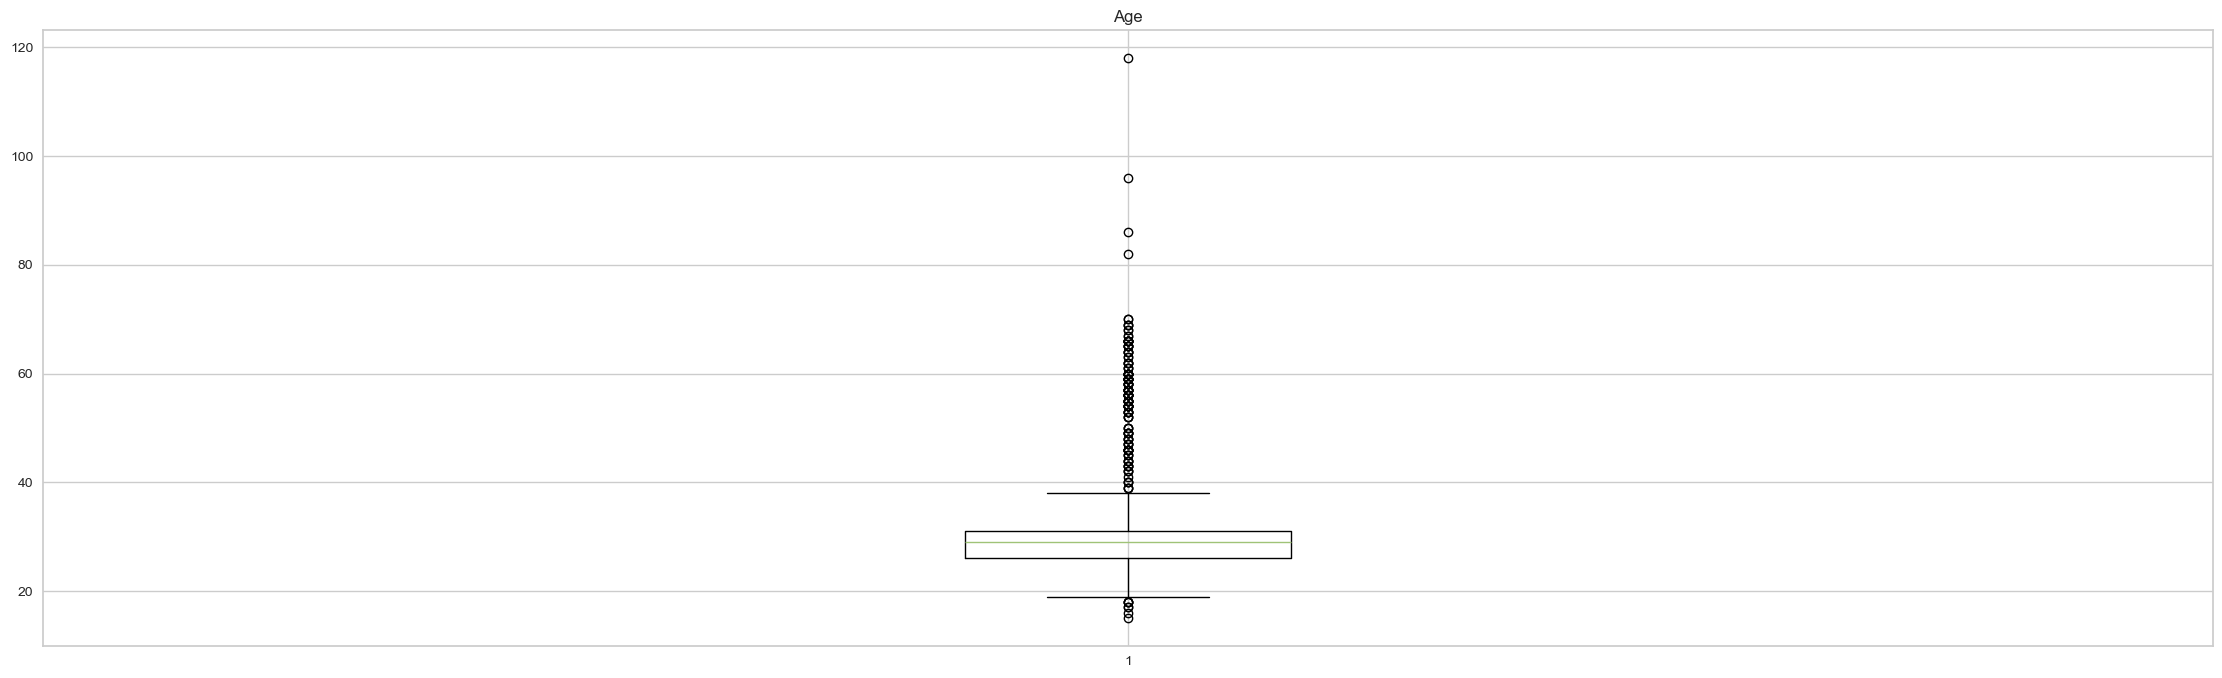

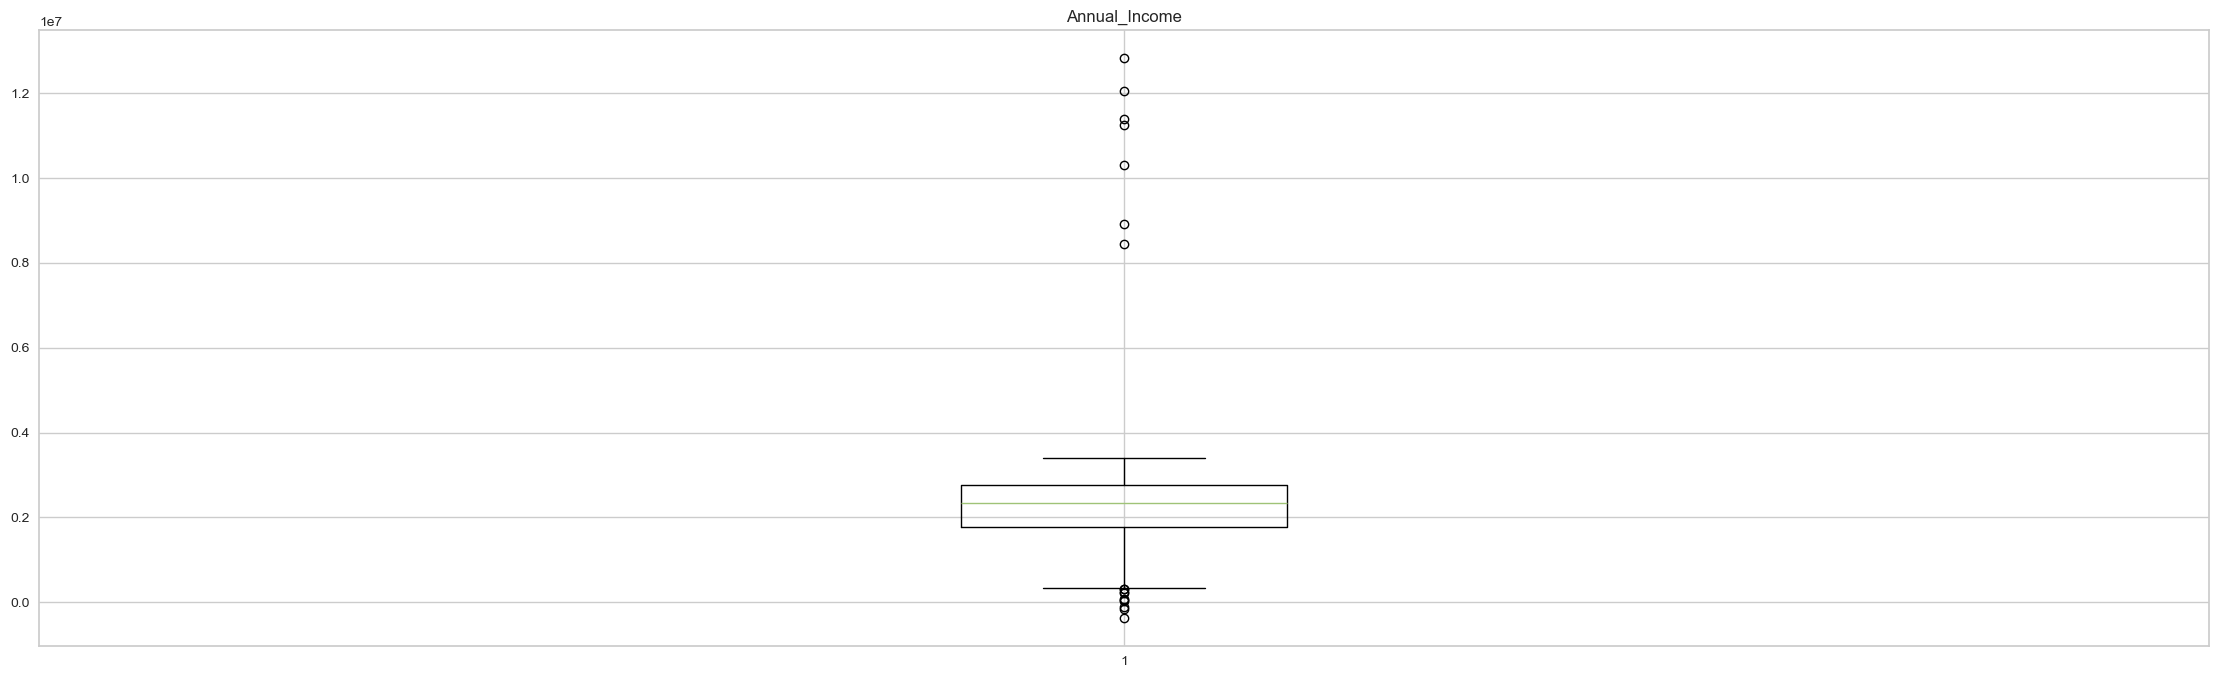

In [29]:
#Boxplot for numerical continuous column
for i in ['Age','Annual_Income']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

Text(0.5, 1.0, 'City preferences for EV')

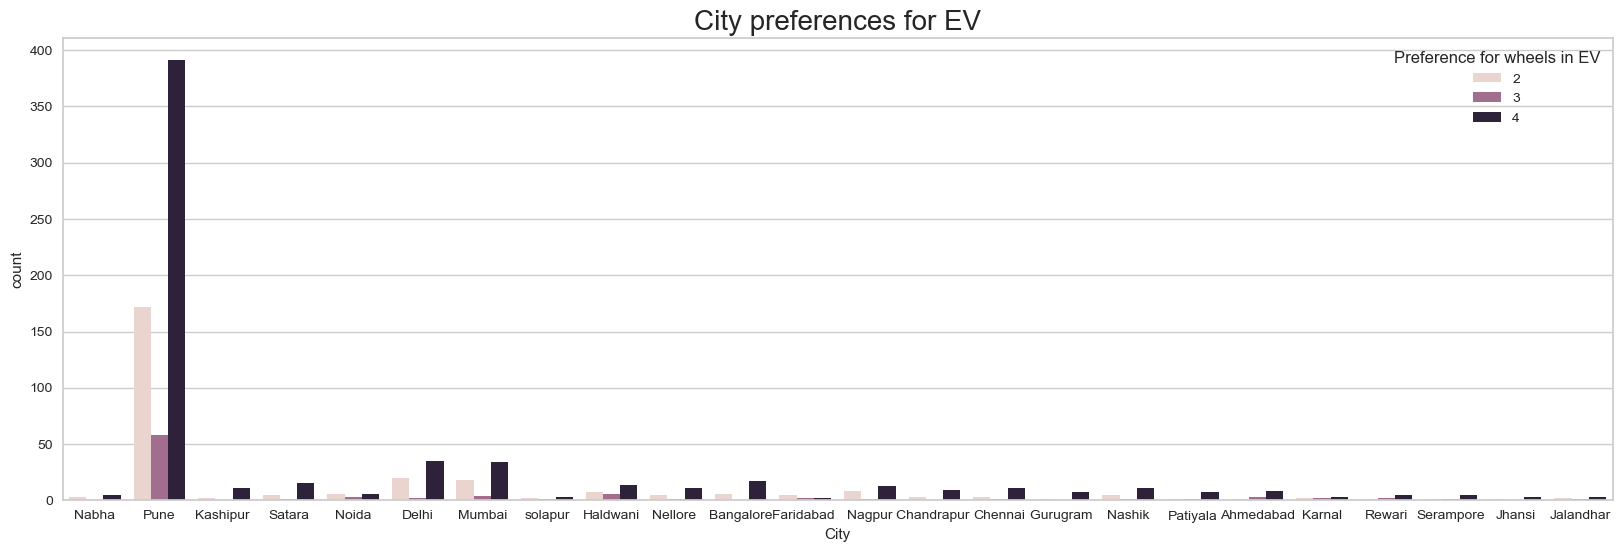

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(x='City', hue='Preference for wheels in EV',data=df)
plt.title("City preferences for EV", fontsize = 20)


Text(0.5, 1.0, 'Age category for EV')

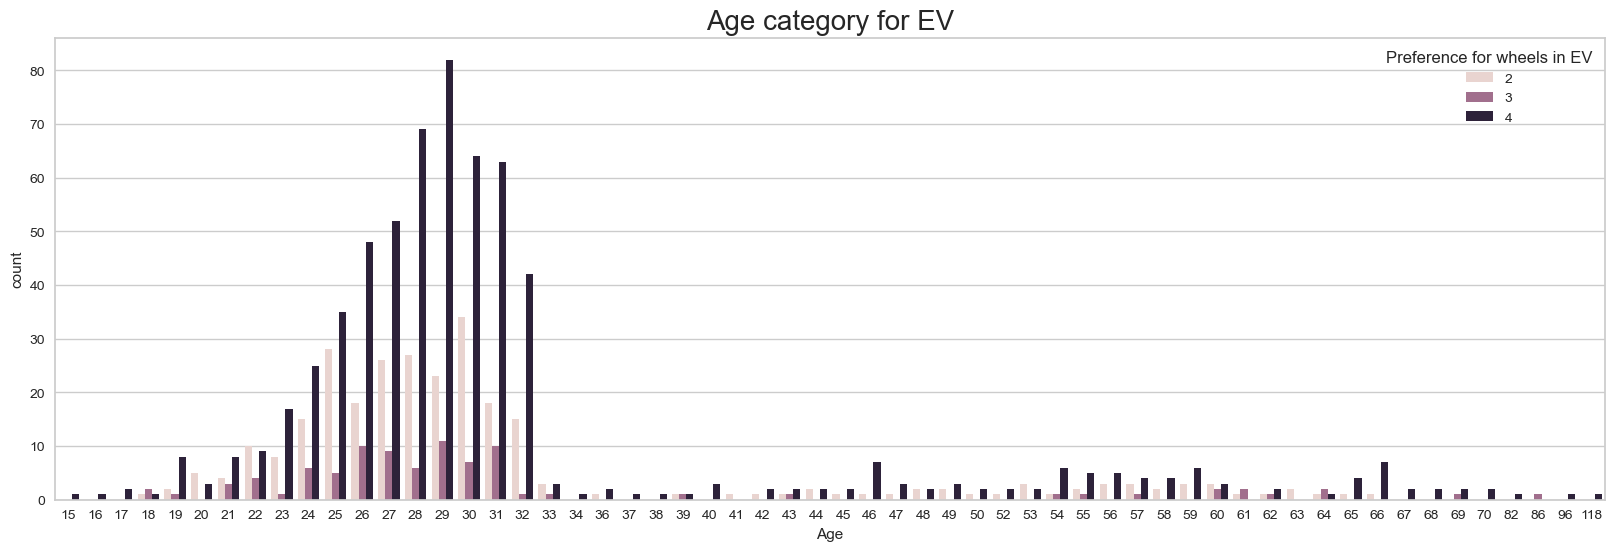

In [31]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Preference for wheels in EV',data=df)
plt.title("Age category for EV", fontsize = 20)

Text(0.5, 1.0, 'Marital Status Versus EV category')

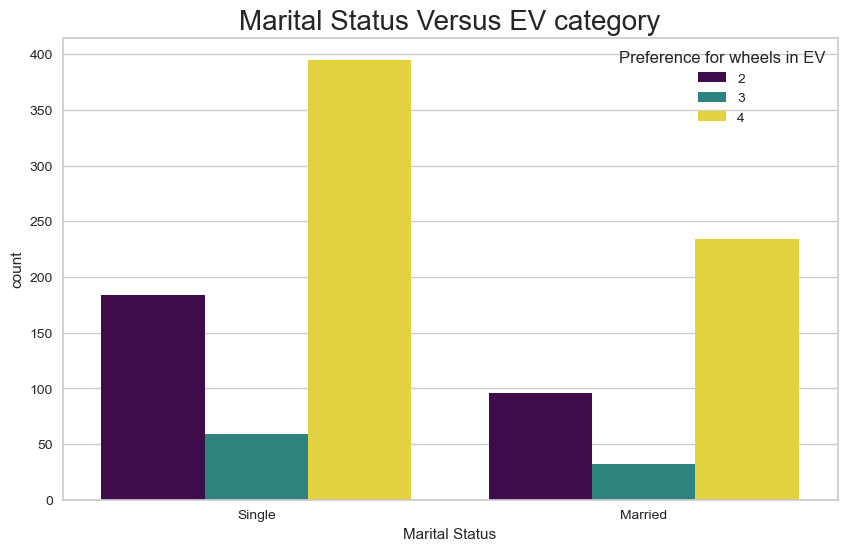

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', palette="viridis", hue='Preference for wheels in EV',data=df)
plt.title("Marital Status Versus EV category", fontsize = 20)

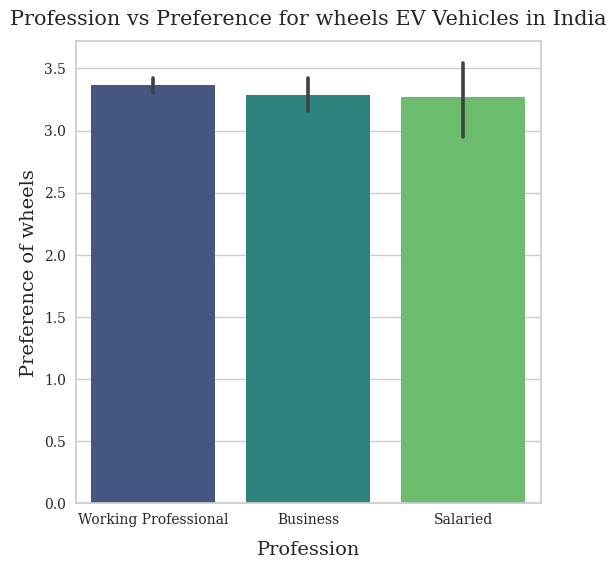

In [33]:
# Grand Total data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y='Preference for wheels in EV', x='Profession', palette='viridis')
plt.ylabel('Preference of wheels', fontsize=14, family='serif')
plt.xlabel('Profession', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Profession vs Preference for wheels EV Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

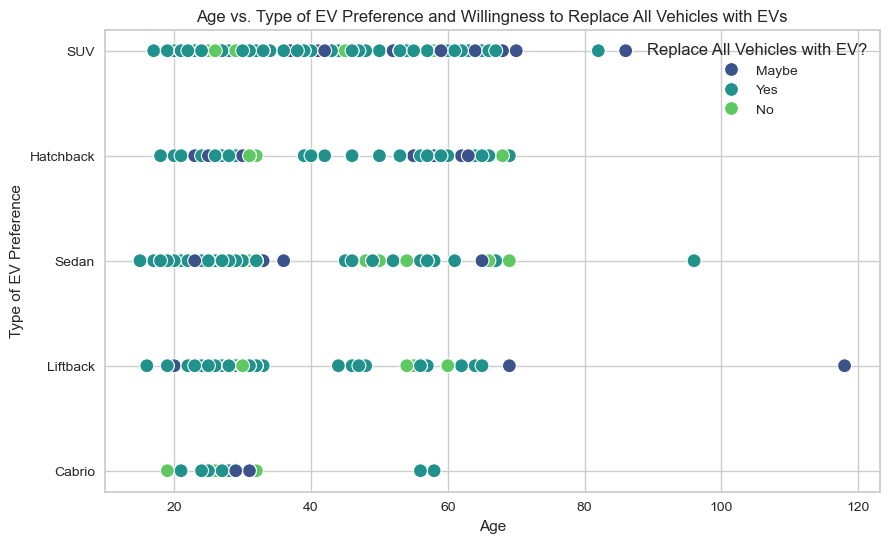

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='If Yes/Maybe what type of  EV would you prefer?', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='viridis', s=100)
plt.title('Age vs. Type of EV Preference and Willingness to Replace All Vehicles with EVs')
plt.xlabel('Age')
plt.ylabel('Type of EV Preference')
plt.legend(title='Replace All Vehicles with EV?')

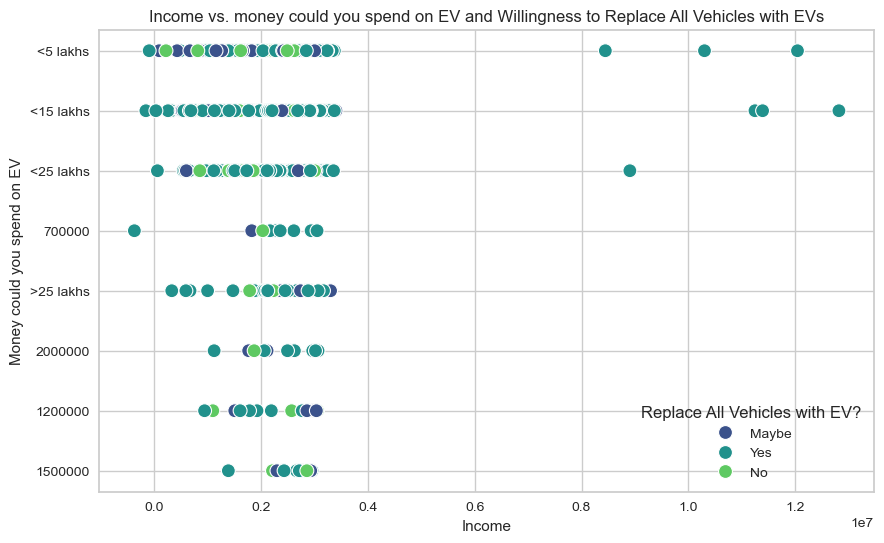

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Income', y='How much money could you spend on an Electronic vehicle?', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='viridis', s=100)
plt.title('Income vs. money could you spend on EV and Willingness to Replace All Vehicles with EVs')
plt.xlabel('Income')
plt.ylabel('Money could you spend on EV')
plt.legend(title='Replace All Vehicles with EV?')

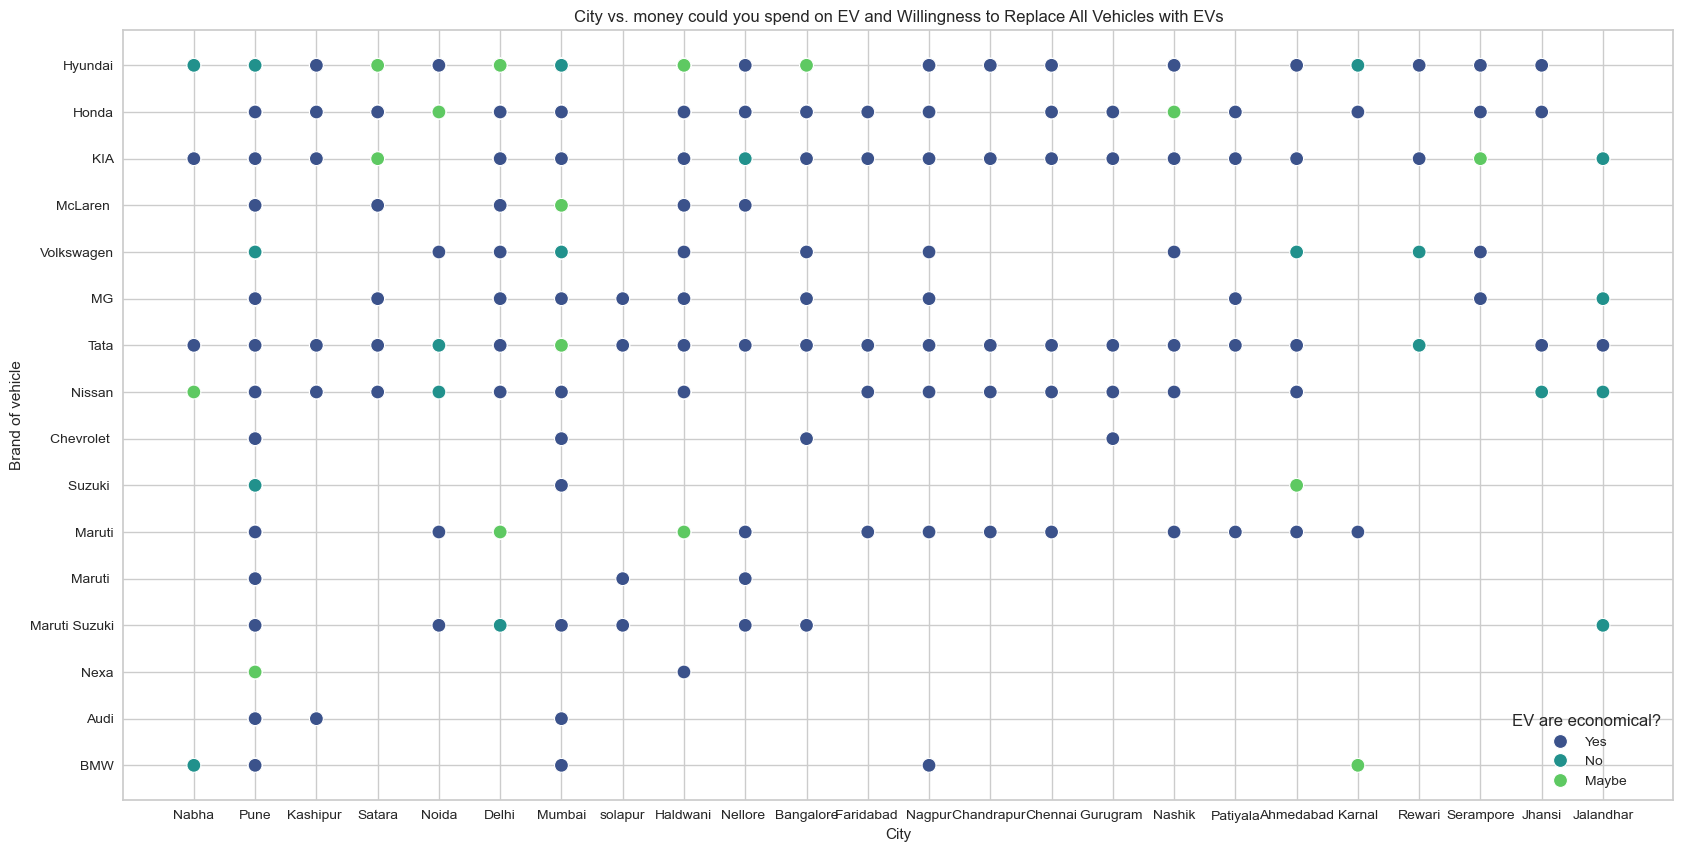

In [36]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='City', y='Which brand of vehicle do you currently own?', hue='Do you think Electronic Vehicles are economical?', palette='viridis', s=100)
plt.title('City vs. money could you spend on EV and Willingness to Replace All Vehicles with EVs')
plt.xlabel('City')
plt.ylabel('Brand of vehicle')
plt.legend(title='EV are economical?')

Different types of EV -dataset2

In [38]:
df1 = pd.read_csv('final_dataset.csv')

In [39]:
df1.head()

State Name  Two Wheeler  Three Wheeler  Four Wheeler  \
0  Andaman and Nicobar Island            1             30            81   
1           Arunachal Pradesh           14              0             5   
2                       Assam          721          47041           161   
3                       Bihar         5003          59079           114   
4                  Chandigarh          298           1410           182   

   Goods Vehicles  Public Service Vehicle  Special Category Vehicles  \
0               0                      40                          0   
1               0                       0                          0   
2               7                      15                          0   
3              11                      26                          0   
4               0                      40                          0   

   Ambulance/Hearses  Construction Equipment Vehicle  Other  Grand Total  \
0                  0                               0      7          159   
1                  0                               0      1           20   
2                  0                               0      2        47947   
3                  0                               0      8        64241   
4                  0                               0      1         1931   

   total-charging-stations  
0                        3  
1                        9  
2                       10  
3                        9  
4                        2

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   State Name                      32 non-null     object
 1   Two Wheeler                     32 non-null     int64 
 2   Three Wheeler                   32 non-null     int64 
 3   Four Wheeler                    32 non-null     int64 
 4   Goods Vehicles                  32 non-null     int64 
 5   Public Service Vehicle          32 non-null     int64 
 6   Special Category Vehicles       32 non-null     int64 
 7   Ambulance/Hearses               32 non-null     int64 
 8   Construction Equipment Vehicle  32 non-null     int64 
 9   Other                           32 non-null     int64 
 10  Grand Total                     32 non-null     int64 
 11  total-charging-stations         32 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 3.1+ KB


In [41]:
print('DF1 Shape: ', df1.shape)

DF1 Shape:  (32, 12)


In [42]:
print(df1.isna().sum())

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           0
dtype: int64


In [43]:
print(df1.nunique())

State Name                        32
Two Wheeler                       31
Three Wheeler                     29
Four Wheeler                      32
Goods Vehicles                    22
Public Service Vehicle            21
Special Category Vehicles          7
Ambulance/Hearses                  3
Construction Equipment Vehicle     4
Other                             23
Grand Total                       31
total-charging-stations           25
dtype: int64


EDA for df1(final_dataset)

In [45]:
df1.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations'],
      dtype='object')

In [46]:
df1.describe()

Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
count     32.000000      32.000000      32.00000       32.000000   
mean    8829.437500   20224.562500     822.96875       94.875000   
std    15027.420445   49311.798762    1661.50339      287.596912   
min        1.000000       0.000000       2.00000        0.000000   
25%       68.500000      31.500000      13.75000        1.750000   
50%     1984.500000    1992.000000     131.50000       10.000000   
75%    10306.500000   17007.250000     638.50000       31.250000   
max    56737.000000  257159.000000    7212.00000     1281.000000   

       Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses  \
count               32.000000                   32.00000          32.000000   
mean                63.718750                   12.81250           0.187500   
std                161.503467                   60.76047           0.470929   
min                  0.000000                    0.00000           0.000000   
25%                  0.750000                    0.00000           0.000000   
50%                 12.500000                    0.00000           0.000000   
75%                 40.000000                    1.00000           0.000000   
max                851.000000                  344.00000           2.000000   

       Construction Equipment Vehicle        Other    Grand Total  \
count                       32.000000    32.000000      32.000000   
mean                        12.406250   137.875000   30198.843750   
std                         65.050283   377.119879   54220.859227   
min                          0.000000     0.000000      20.000000   
25%                          0.000000     1.000000    1323.000000   
50%                          0.000000    11.000000   11156.500000   
75%                          0.000000    58.000000   45205.000000   
max                        368.000000  1602.000000  276217.000000   

       total-charging-stations  
count                32.000000  
mean                 46.531250  
std                  63.356637  
min                   1.000000  
25%                   7.750000  
50%                  18.000000  
75%                  63.750000  
max                 265.000000

In [47]:
print(f"Duplicates: {df1.duplicated().sum()}")
duplicate = df1[df1.duplicated()]
print("Duplicate Rows :")
# Print the resultant rows
duplicate

Duplicates: 0
Duplicate Rows :


Empty DataFrame
Columns: [State Name, Two Wheeler, Three Wheeler, Four Wheeler, Goods Vehicles, Public Service Vehicle, Special Category Vehicles, Ambulance/Hearses, Construction Equipment Vehicle, Other, Grand Total, total-charging-stations]
Index: []

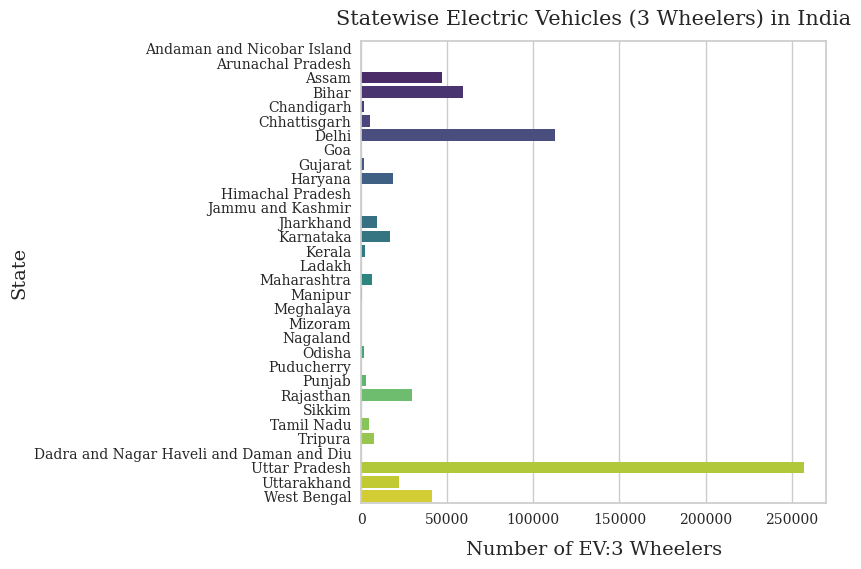

In [48]:
# 3 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Three Wheeler', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV:3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

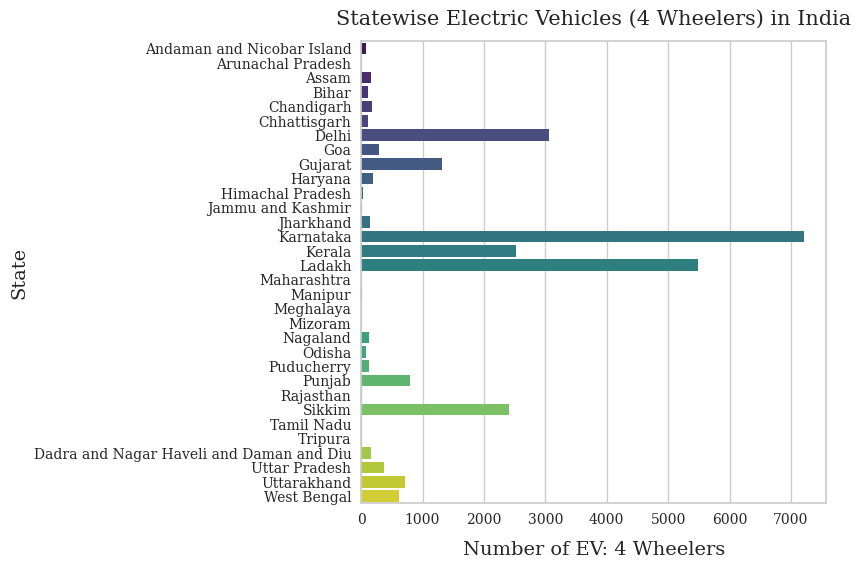

In [49]:
# 4 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Four Wheeler', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

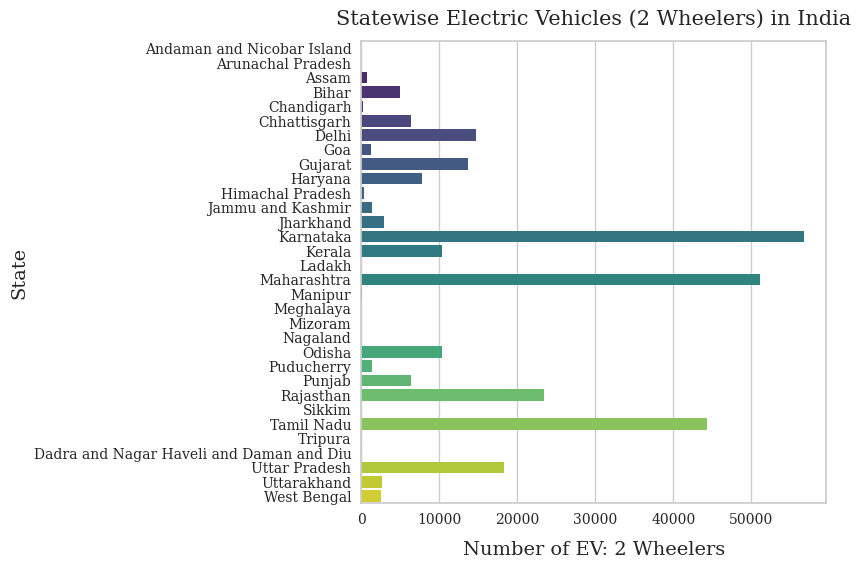

In [50]:
# 2 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Two Wheeler', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

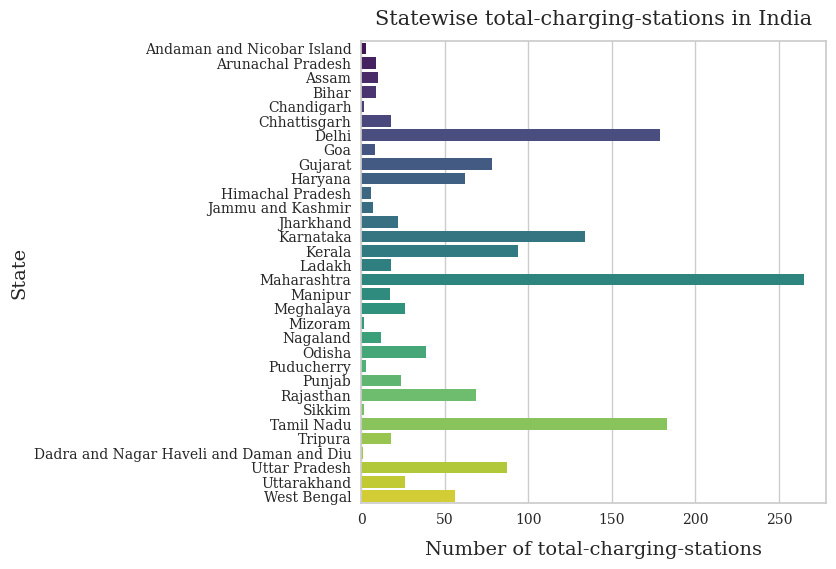

In [51]:
# total-charging-stations data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='total-charging-stations', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of total-charging-stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise total-charging-stations in India', weight=200, family='serif', size=15, pad=12)
plt.show()

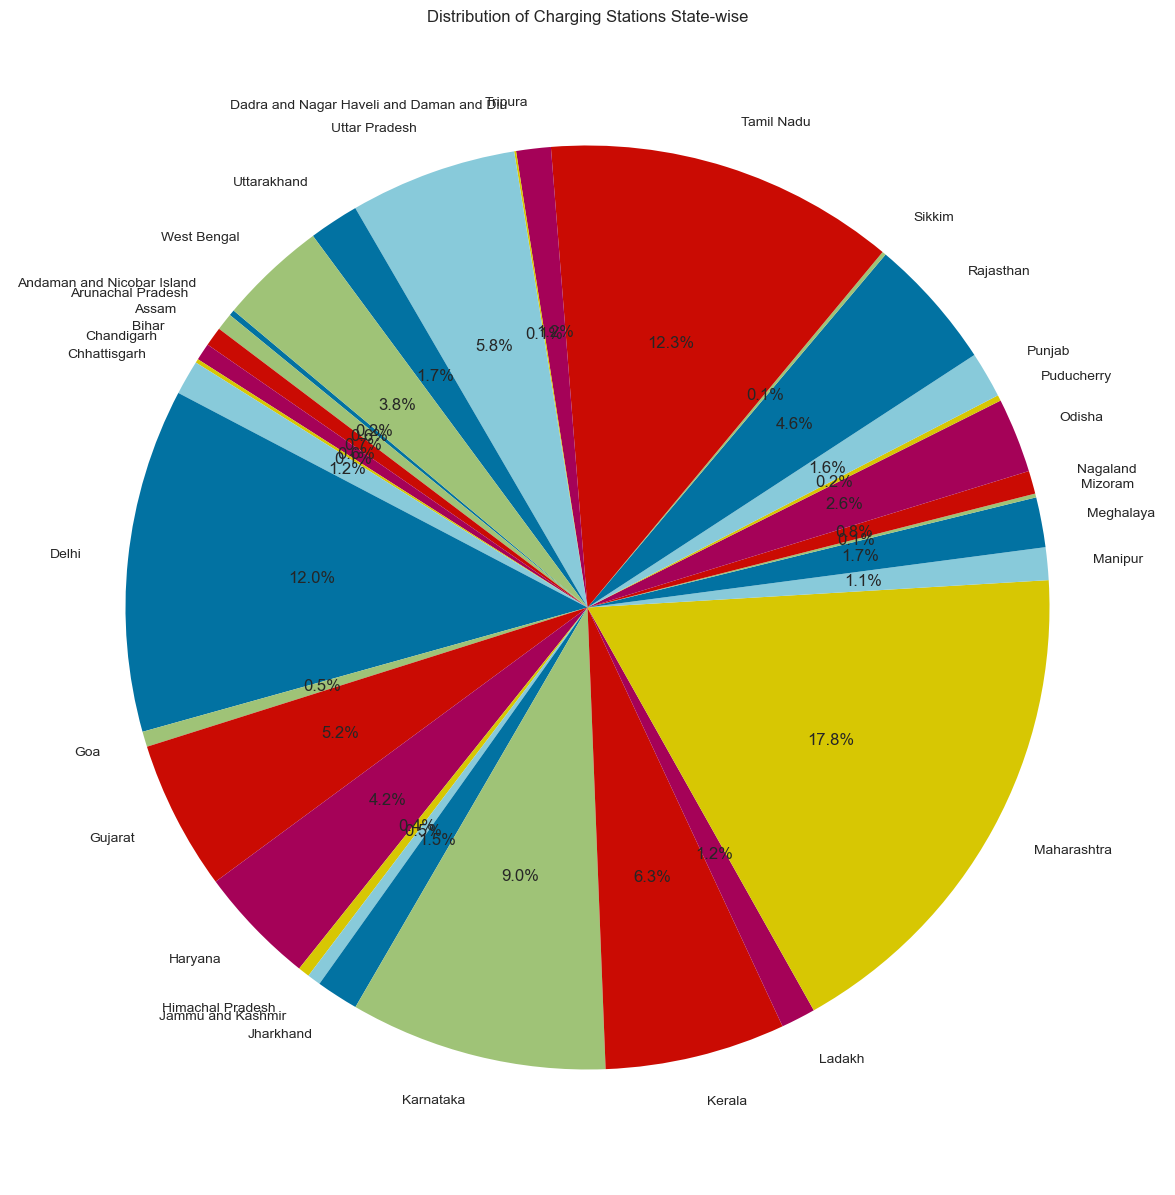

Total Charging Stations: 1489


In [52]:
# Plotting pie chart for the distribution
plt.figure(figsize=(15, 15))
plt.pie(df1['total-charging-stations'], labels=df1['State Name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charging Stations State-wise')
plt.show()

# Display total number of charging stations
totalChargingStations = sum(df1['total-charging-stations'])
print(f'Total Charging Stations: {totalChargingStations}')

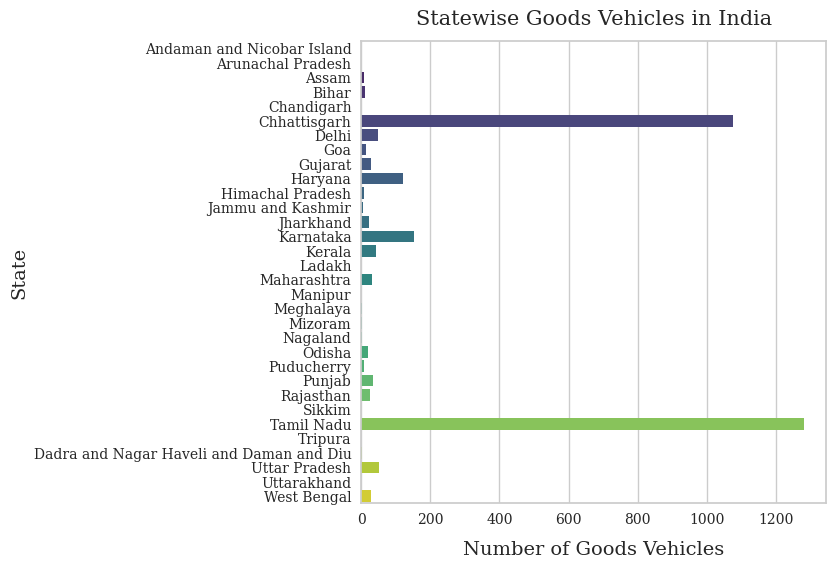

In [53]:
# Goods Vehicles data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Goods Vehicles', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Goods Vehicles', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Goods Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

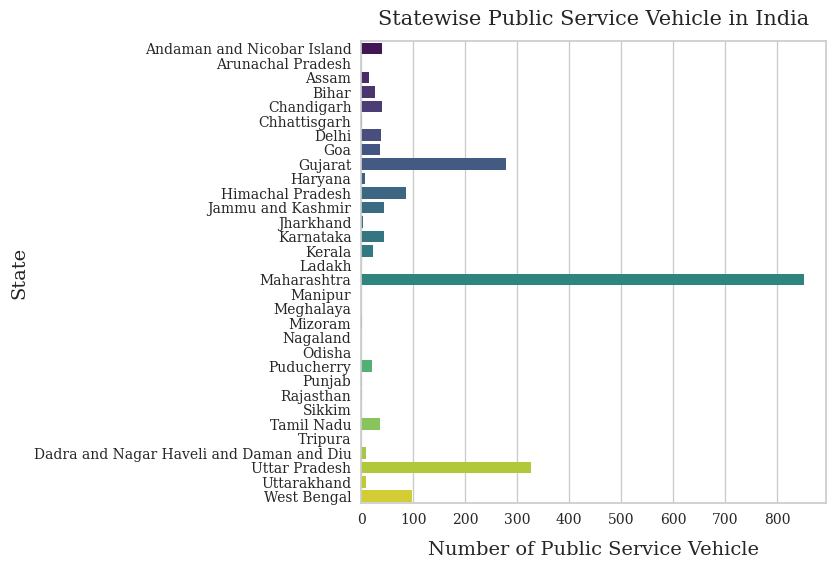

In [54]:
# Public Service Vehicle data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Public Service Vehicle', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Public Service Vehicle', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Public Service Vehicle in India', weight=200, family='serif', size=15, pad=12)
plt.show()

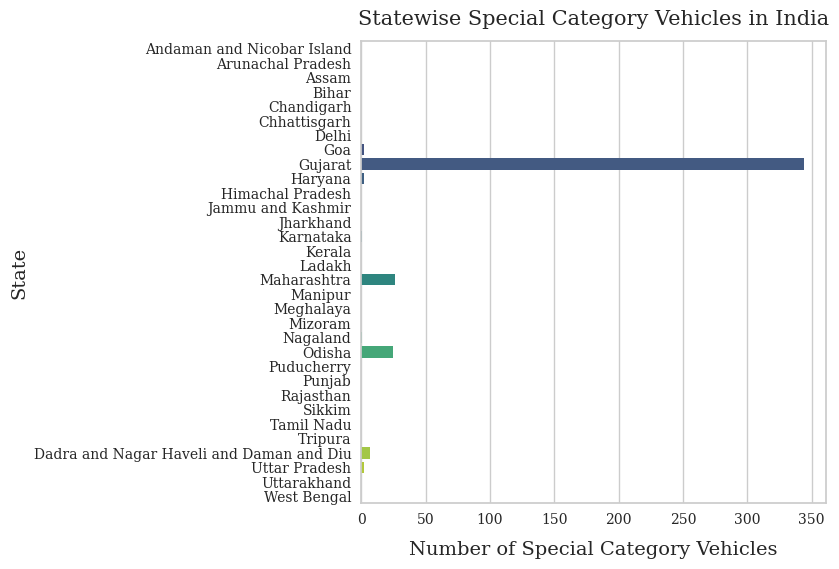

In [55]:
# Special Category Vehicles data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Special Category Vehicles', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Special Category Vehicles', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Special Category Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

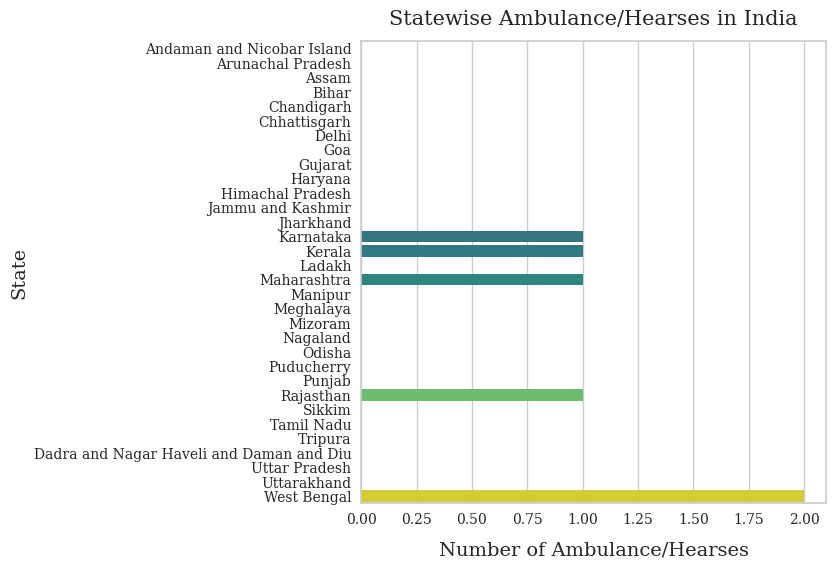

In [56]:
# Ambulance/Hearses data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Ambulance/Hearses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Ambulance/Hearses', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Ambulance/Hearses in India', weight=200, family='serif', size=15, pad=12)
plt.show()

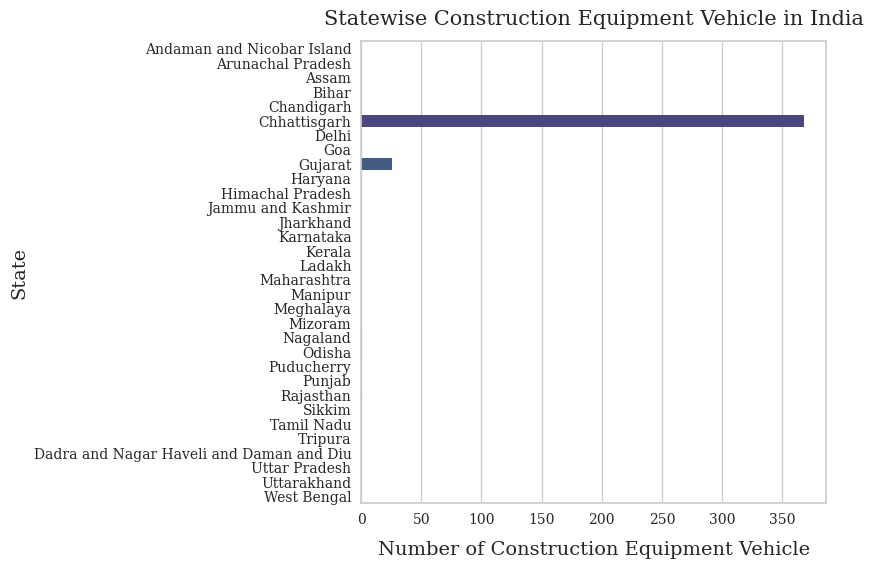

In [57]:
# Construction Equipment Vehicle data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Construction Equipment Vehicle', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Construction Equipment Vehicle', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Construction Equipment Vehicle in India', weight=200, family='serif', size=15, pad=12)
plt.show()

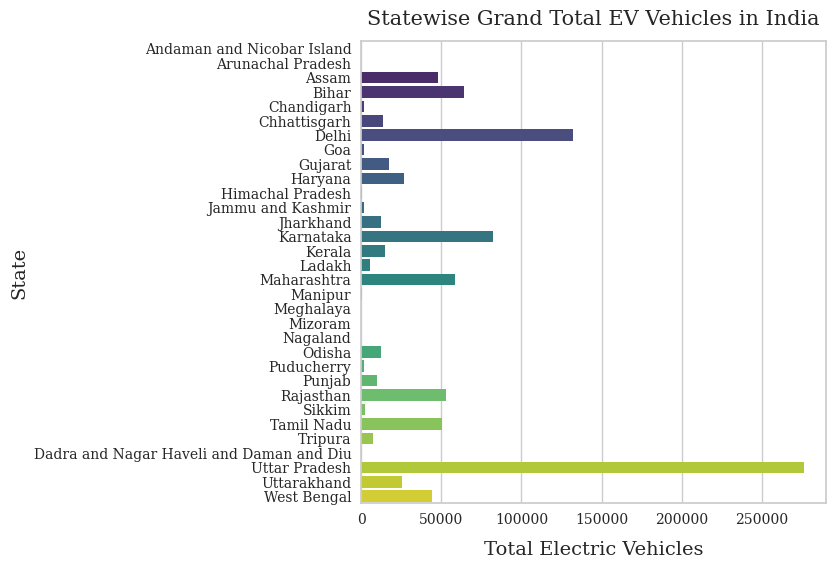

In [58]:
# Grand Total data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Grand Total', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Total Electric Vehicles', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Grand Total EV Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

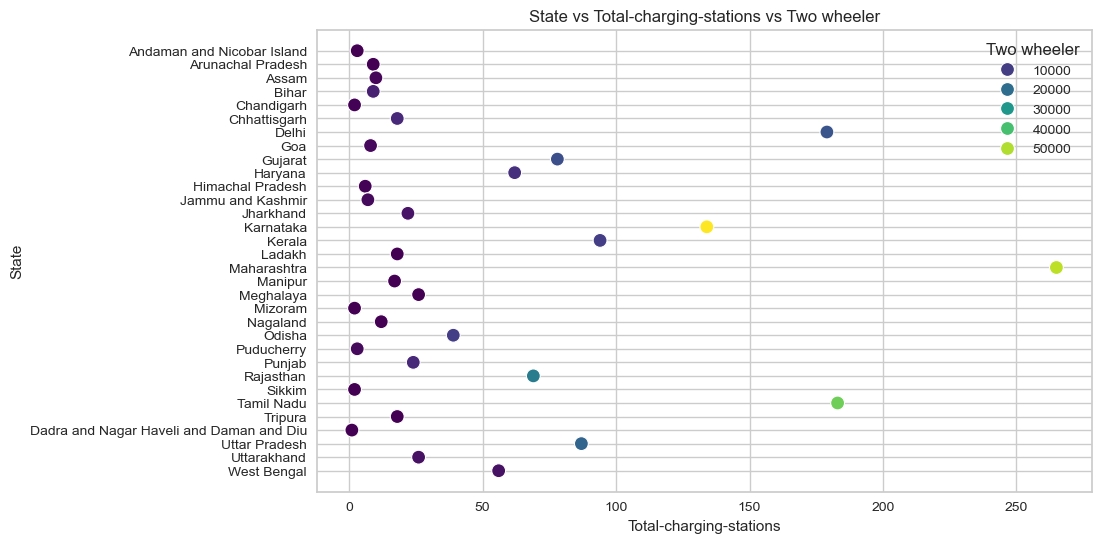

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='total-charging-stations', y='State Name', hue='Two Wheeler', palette='viridis', s=100)
plt.title('State vs Total-charging-stations vs Two wheeler')
plt.xlabel('Total-charging-stations')
plt.ylabel('State')
plt.legend(title='Two wheeler')
plt.show()

Electric Vehicles - dataset 3

In [61]:
df2 = pd.read_csv('EV_cars_India_2023.csv')

In [62]:
df2.head()

Car_name            Car_price Batter_cap          Drive_range  \
0    MG Comet EV           7.98  lakh   17.3 kWh  230  km/full charge   
1  Tata Tiago EV   8.69 - 11.99  lakh   19.2 KWh   250 km/full charge   
2  Tata Tigor EV  12.49 - 13.75  lakh     26 kWh   315 km/full charge   
3       MG ZS EV  23.38 - 27.40  lakh   50.3 kWh   461 km/full charge   
4     BYD Atto 3  33.99 - 34.49  lakh  60.48 kWh   521 km/full charge   

      Power(BHP)     Charge_time transmission  Boot_space(Liters)  \
0          41.42         7 Hours    Automatic                 350   
1  60.34 - 73.75  58 Min(10-80%)    Automatic                 240   
2          73.75            7.5h    Automatic                 316   
3         174.33  8.5 to 9 Hours    Automatic                 448   
4         201.15    9.5-10 Hours    Automatic                 440   

   Top_speed( km/h)  
0               101  
1               109  
2               120  
3               175  
4               160

In [63]:
print('DF2 Shape: ', df2.shape)

DF2 Shape:  (30, 9)


In [64]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_name            30 non-null     object
 1   Car_price           30 non-null     object
 2   Batter_cap          30 non-null     object
 3   Drive_range         30 non-null     object
 4   Power(BHP)          30 non-null     object
 5   Charge_time         30 non-null     object
 6   transmission        30 non-null     object
 7   Boot_space(Liters)  30 non-null     int64 
 8   Top_speed( km/h)    30 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 2.2+ KB
None


In [65]:
print(df2.isna().sum())

Car_name              0
Car_price             0
Batter_cap            0
Drive_range           0
Power(BHP)            0
Charge_time           0
transmission          0
Boot_space(Liters)    0
Top_speed( km/h)      0
dtype: int64


In [66]:
print(df2.nunique())

Car_name              30
Car_price             29
Batter_cap            18
Drive_range           18
Power(BHP)            19
Charge_time           18
transmission           1
Boot_space(Liters)    21
Top_speed( km/h)      19
dtype: int64


EDA for df2(EV_cars_India_2023)

In [68]:
df2.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power(BHP)',
       'Charge_time', 'transmission', 'Boot_space(Liters)',
       'Top_speed( km/h)'],
      dtype='object')

In [69]:
df2.isna().sum()

Car_name              0
Car_price             0
Batter_cap            0
Drive_range           0
Power(BHP)            0
Charge_time           0
transmission          0
Boot_space(Liters)    0
Top_speed( km/h)      0
dtype: int64

In [70]:
df2.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power(BHP)',
       'Charge_time', 'transmission', 'Boot_space(Liters)',
       'Top_speed( km/h)'],
      dtype='object')

In [71]:
df2.Car_name

0               MG Comet EV
1             Tata Tiago EV
2             Tata Tigor EV
3                  MG ZS EV
4                BYD Atto 3
5     Hyundai Kona Electric
6        Mahindra XUV400 EV
7         Tata Nexon EV Max
8         Mercedes-Benz EQS
9            Audi e-tron GT
10                   BMW i4
11                   BYD E6
12           Porsche Taycan
13        Audi RS e-tron GT
14        Mahindra E Verito
15          Strom Motors R3
16      Tata Nexon EV Prime
17          Hyundai IONIQ 5
18                  Kia EV6
19                   BMW iX
20                   BMW i7
21           Mini Cooper SE
22              Audi e-tron
23              Citroen eC3
24      Volvo XC40 Recharge
25            Jaguar I-Pace
26             Pravaig DEFY
27                PMV EaS E
28        Mercedes-Benz EQB
29        Mercedes-Benz EQC
Name: Car_name, dtype: object

Observation: Mercedes-Volvo,Pravaig DEFY,Benz,BYD, Audi tops the list of EVs with the maximum power in the Indian automobile market.

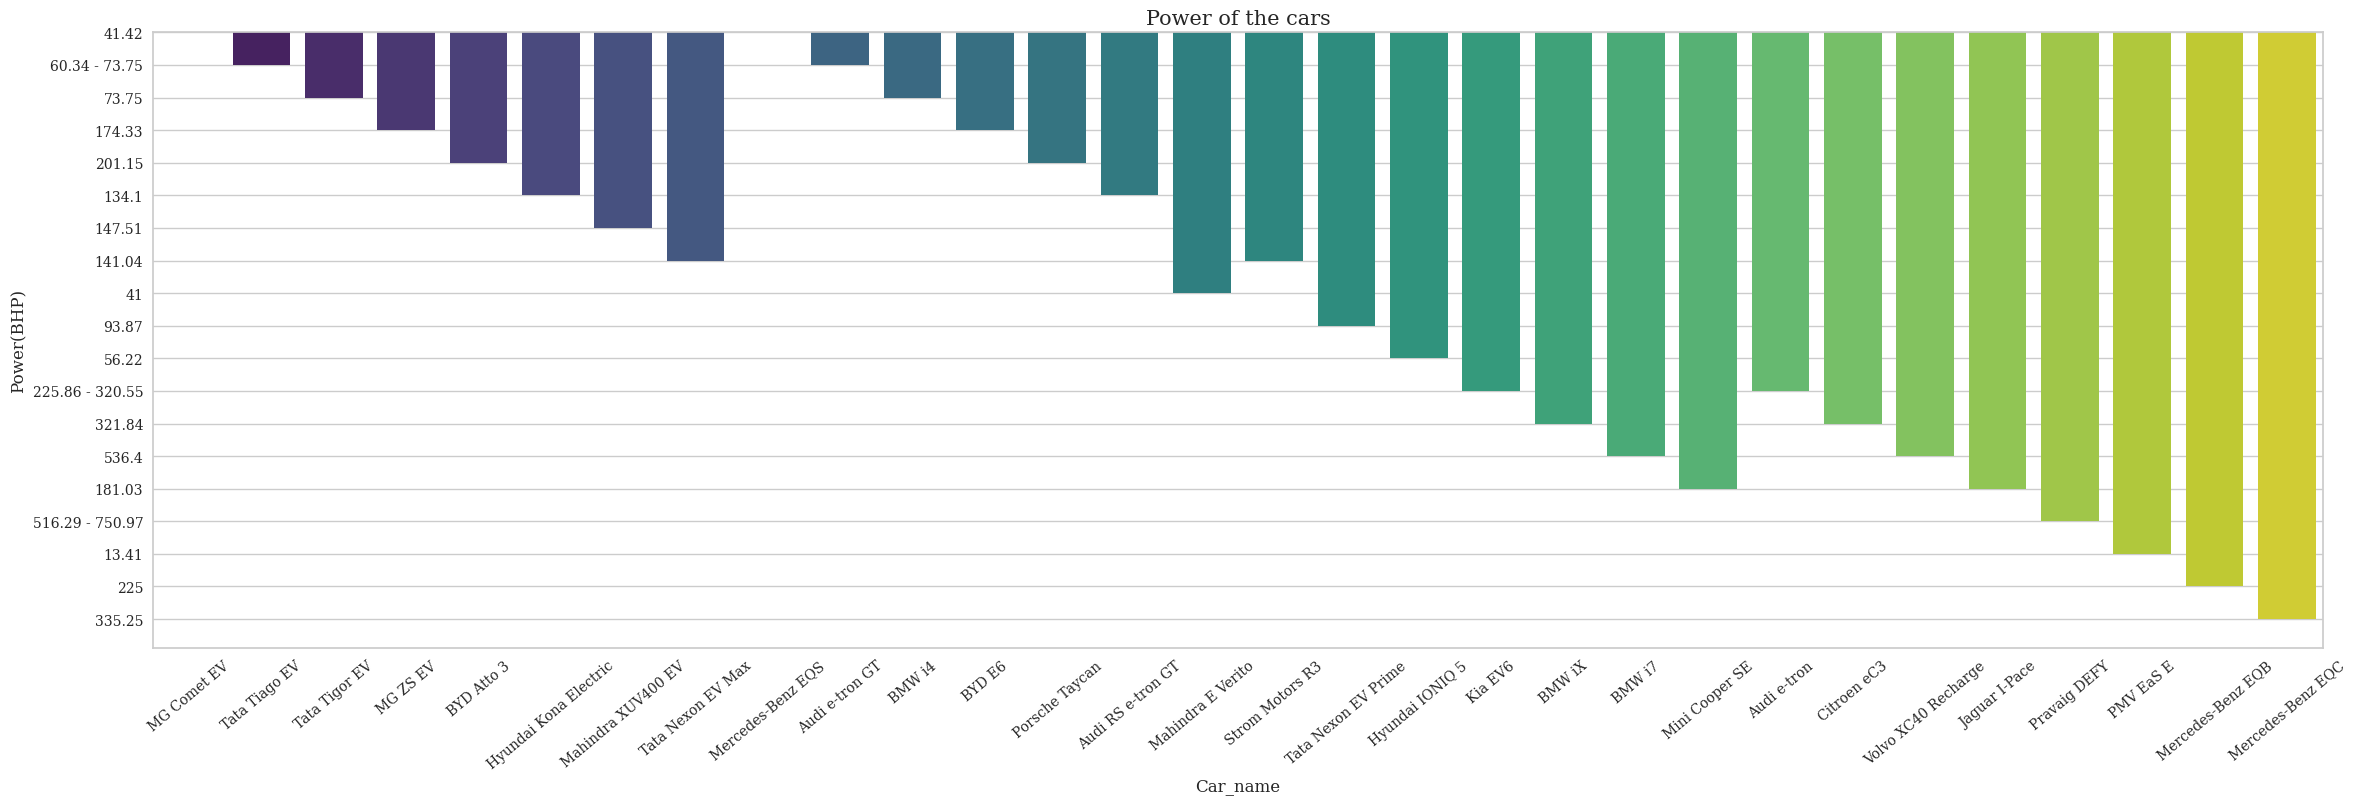

In [73]:
# power analysis of the EV
sns.barplot(data=df2, y=df2['Power(BHP)'].sort_values(ascending=True), x='Car_name', palette='viridis')
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Car_name',family='serif', size=12)
plt.ylabel('Power(BHP)', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Power of the cars', family='serif', size=15);

Anaysis of Bootspace of EVs

Observation: Pravaig DEFY ,Volvo and Audi have more bootspace.

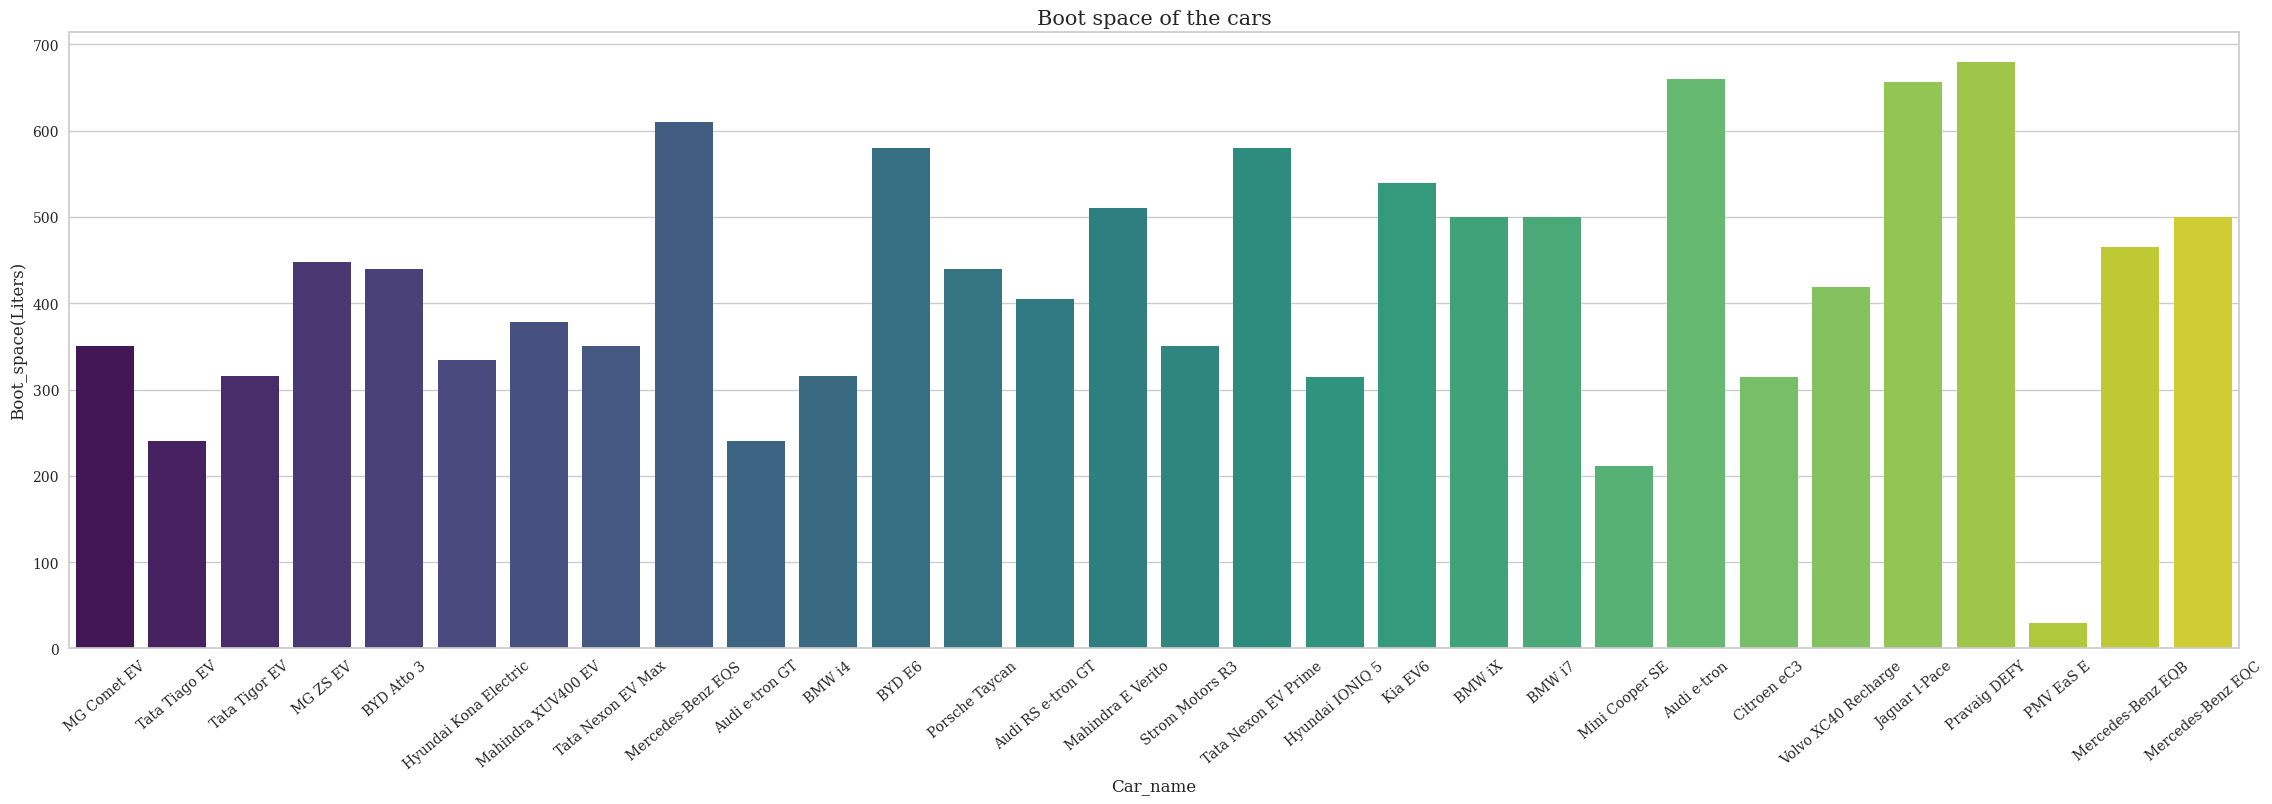

In [76]:
# power analysis of the EV
sns.barplot(data=df2, y=df2['Boot_space(Liters)'].sort_values(ascending=True), x='Car_name', palette='viridis')
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Car_name',family='serif', size=12)
plt.ylabel('Boot_space(Liters)', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Boot space of the cars', family='serif', size=15);

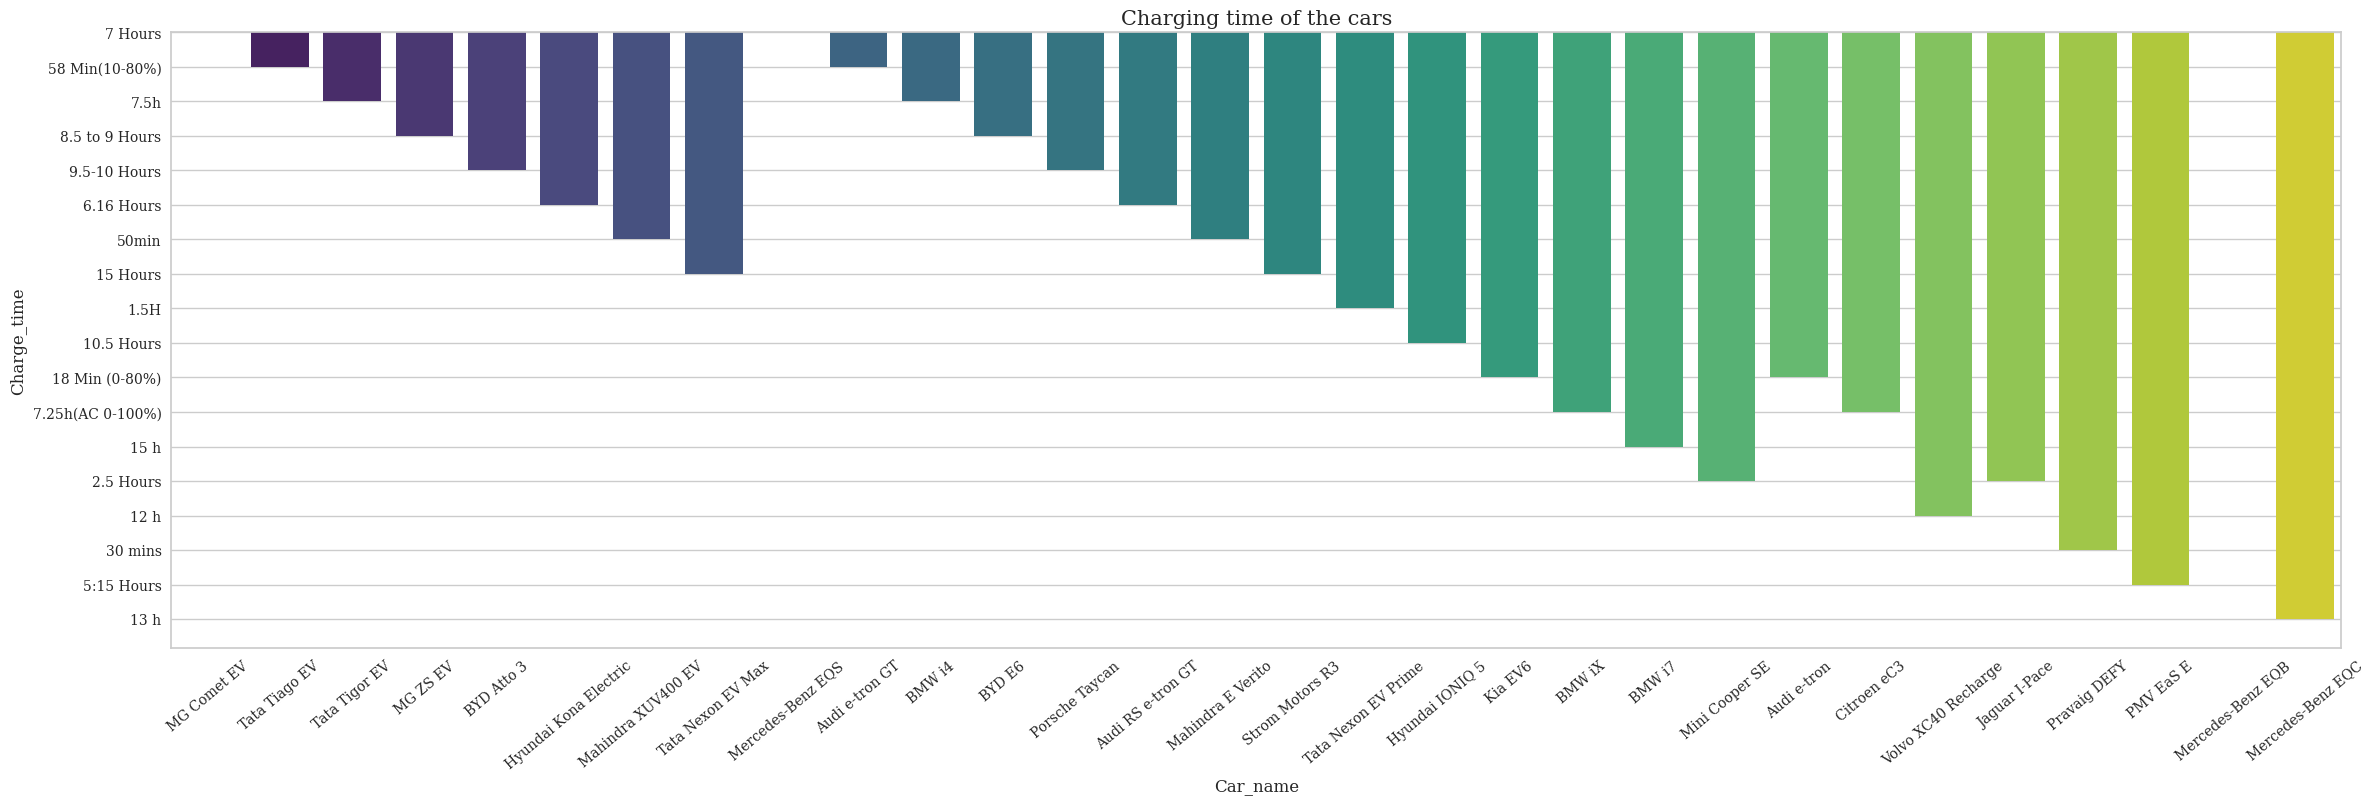

In [77]:
#Charging time analysis of the EV
sns.barplot(data=df2, y=df2['Charge_time'].sort_values(ascending=True), x='Car_name', palette='viridis')
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Car_name',family='serif', size=12)
plt.ylabel('Charge_time', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Charging time of the cars', family='serif', size=15);

Observations: Mercedes-Benz, Audi, BMW, Porsche Taycan have maximum speed.

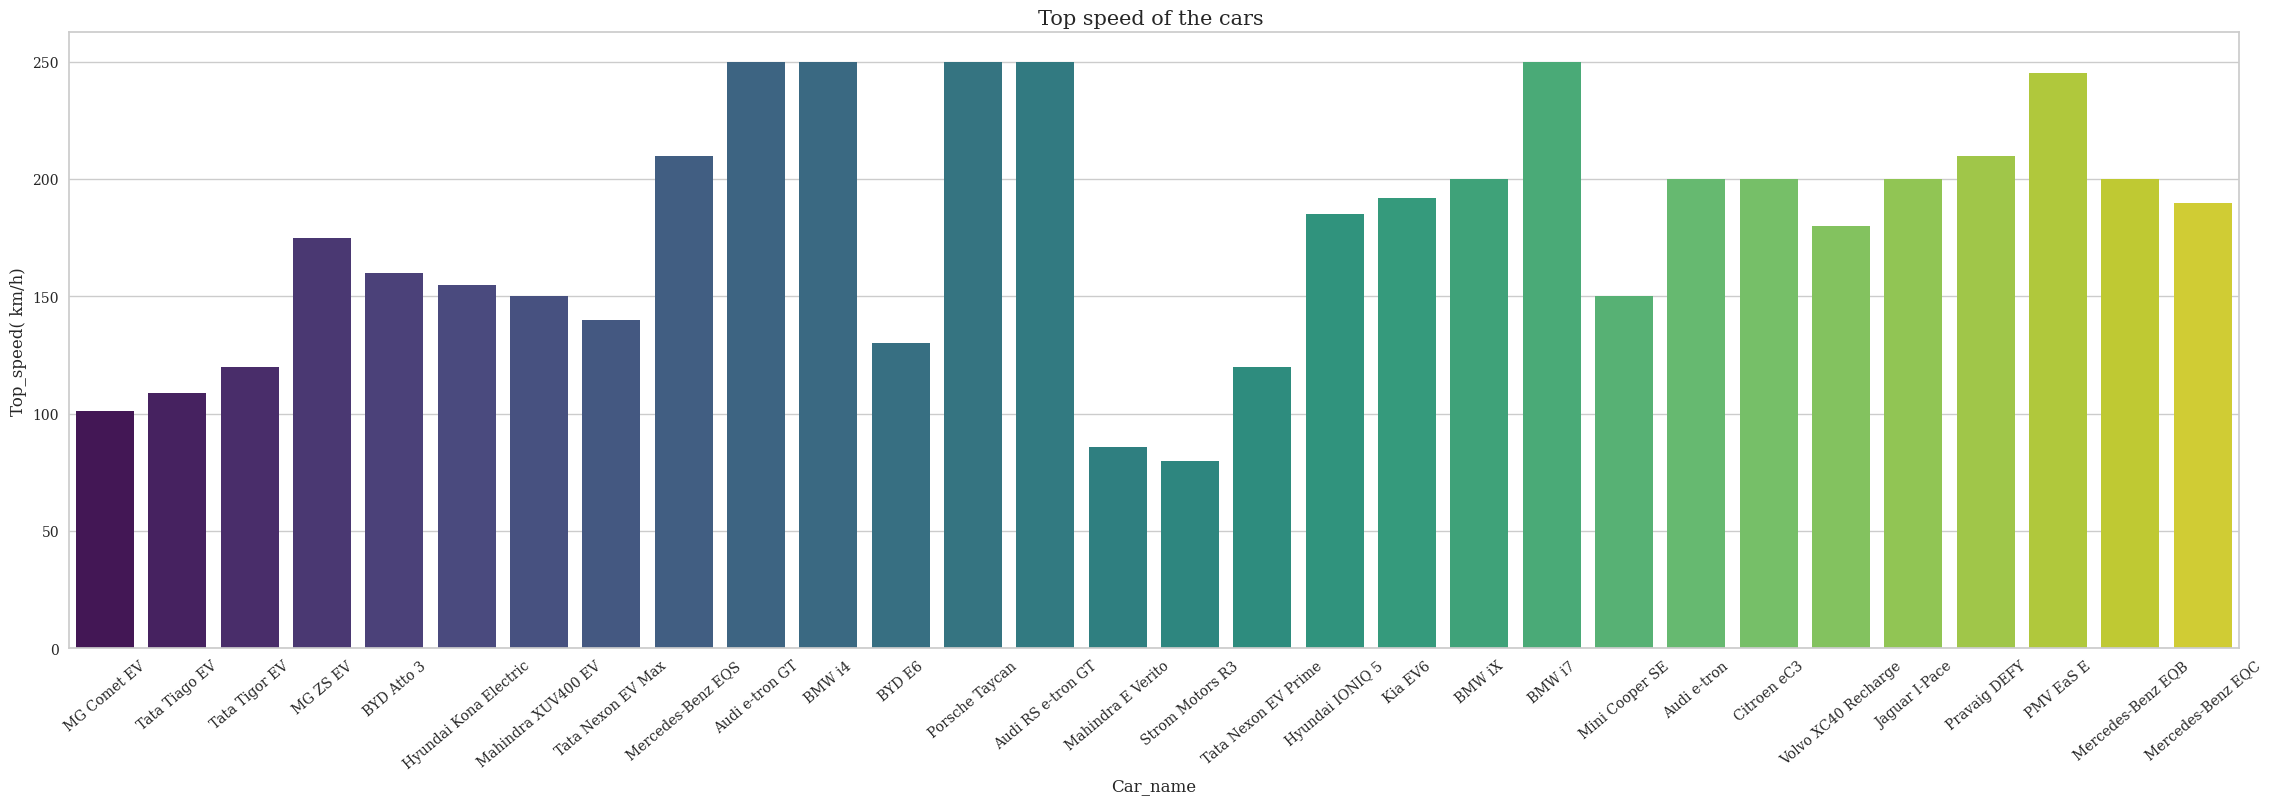

In [78]:
# Speed analysis of the EVs
sns.barplot(data=df2, y=df2['Top_speed( km/h)'].sort_values(ascending=True), x='Car_name', palette='viridis')
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Car_name',family='serif', size=12)
plt.ylabel('Top_speed( km/h)', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Top speed of the cars ', family='serif', size=15);

Preprocessing and Model Building Using K-Means Clusteing for df1(EV_Customer_preferences)

In [80]:
df.head()

Age       City            Profession Marital Status Education  \
0   30      Nabha  Working Professional         Single  Graduate   
1   27       Pune  Working Professional         Single  Graduate   
2   32  Kashipur   Working Professional         Single  Graduate   
3   55       Pune              Business         Single  Graduate   
4   26     Satara  Working Professional         Single  Graduate   

   No. of Family members  Annual_Income  \
0                      5    1193875.647   
1                      4    1844540.398   
2                      4    2948150.113   
3                      3    2832379.739   
4                      4    2638750.576   

  Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                              Maybe                     
1                                                Yes                     
2                                                Yes                     
3                                              Maybe                     
4                                                Yes                     

  If Yes/Maybe what type of  EV would you prefer?  \
0                                             SUV   
1                                             SUV   
2                                       Hatchback   
3                                       Hatchback   
4                                           Sedan   

  Do you think Electronic Vehicles are economical?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                               No   
4                                              Yes   

  Which brand of vehicle do you currently own?  \
0                                      Hyundai   
1                                        Honda   
2                                          KIA   
3                                      Hyundai   
4                                     McLaren    

  How much money could you spend on an Electronic vehicle?  \
0                                           <5 lakhs         
1                                          <15 lakhs         
2                                          <15 lakhs         
3                                           <5 lakhs         
4                                          <15 lakhs         

   Preference for wheels in EV  \
0                            2   
1                            4   
2                            4   
3                            4   
4                            4   

  Do you think Electronic vehicles will replace fuel cars in India?  
0                                   I don't think so                 
1                                   Yes, in <20years                 
2                                   Yes, in <20years                 
3                                  Yes, in <10 years                 
4                                   Yes, in <20years

In [81]:
#Treating outliers
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

18.5 38.5 5.0


In [82]:
df.loc[df['Age']>max_limit,'Age']=np.mean(df.Age)
df.loc[df['Age']<min_limit,'Age']=np.mean(df.Age)

In [83]:
#Treating outliers
Q1 = df.Annual_Income.quantile(0.25)
Q3 = df.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

325534.3812500003 4209750.75125 971054.0924999998


In [84]:
df.loc[df['Annual_Income']>max_limit,'Annual_Income']=np.median(df.Annual_Income)
df.loc[df['Annual_Income']<min_limit,'Annual_Income']=np.median(df.Annual_Income)

In [85]:
#Split data into numerical and categorical
numeric_data = df.select_dtypes(include=['int64','float64'])
numeric_data

Age  No. of Family members  Annual_Income  Preference for wheels in EV
0    30.0                      5    1193875.647                            2
1    27.0                      4    1844540.398                            4
2    32.0                      4    2948150.113                            4
3    31.8                      3    2832379.739                            4
4    26.0                      4    2638750.576                            4
..    ...                    ...            ...                          ...
995  31.0                      7    2110722.120                            4
996  29.0                      4    1616287.706                            4
997  30.0                      4    2202829.029                            4
998  24.0                      4    1764744.068                            4
999  30.0                      4    2486664.468                            4

[1000 rows x 4 columns]

In [86]:
category_data = df.select_dtypes(include=['object'])
category_data

City            Profession Marital Status      Education  \
0        Nabha  Working Professional         Single       Graduate   
1         Pune  Working Professional         Single       Graduate   
2    Kashipur   Working Professional         Single       Graduate   
3         Pune              Business         Single       Graduate   
4       Satara  Working Professional         Single       Graduate   
..         ...                   ...            ...            ...   
995       Pune  Working Professional        Married       Graduate   
996       Pune  Working Professional        Married  Post Graduate   
997     Mumbai              Business         Single       Graduate   
998  Ahmedabad  Working Professional        Married       Graduate   
999       Pune              Business         Single       Graduate   

    Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                                Maybe                     
1                                                  Yes                     
2                                                  Yes                     
3                                                Maybe                     
4                                                  Yes                     
..                                                 ...                     
995                                                Yes                     
996                                                 No                     
997                                                Yes                     
998                                                Yes                     
999                                                 No                     

    If Yes/Maybe what type of  EV would you prefer?  \
0                                               SUV   
1                                               SUV   
2                                         Hatchback   
3                                         Hatchback   
4                                             Sedan   
..                                              ...   
995                                             SUV   
996                                             SUV   
997                                             SUV   
998                                             SUV   
999                                        Liftback   

    Do you think Electronic Vehicles are economical?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                 No   
4                                                Yes   
..                                               ...   
995                                              Yes   
996                                              Yes   
997                                              Yes   
998                                              Yes   
999                                              Yes   

    Which brand of vehicle do you currently own?  \
0                                        Hyundai   
1                                          Honda   
2                                            KIA   
3                                        Hyundai   
4                                       McLaren    
..                                           ...   
995                                          KIA   
996                                          KIA   
997                                        Honda   
998                                       Maruti   
999                                      Maruti    

    How much money could you spend on an Electronic vehicle?  \
0                                             <5 lakhs         
1                                            <15 lakhs         
2                                            <15 lakhs         
3                                        

In [87]:
org_df=df.copy()

In [88]:
# List of columns to encode
le=LabelEncoder()
columns_to_encode = [
    'City', 'Profession', 'Marital Status', 'Education',
    'Would you prefer replacing all your vehicles to Electronic vehicles?',
    'If Yes/Maybe what type of  EV would you prefer?',
    'Do you think Electronic Vehicles are economical?',
    'Which brand of vehicle do you currently own?',
    'How much money could you spend on an Electronic vehicle?',
    'Do you think Electronic vehicles will replace fuel cars in India?'
]
# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

# Display the DataFrame
df

Age  City  Profession  Marital Status  Education  No. of Family members  \
0    30.0    13           2               1          0                      5   
1    27.0    19           2               1          0                      4   
2    32.0    11           2               1          0                      4   
3    31.8    19           0               1          0                      3   
4    26.0    21           2               1          0                      4   
..    ...   ...         ...             ...        ...                    ...   
995  31.0    19           2               0          0                      7   
996  29.0    19           2               0          1                      4   
997  30.0    12           0               1          0                      4   
998  24.0     0           2               0          0                      4   
999  30.0    19           0               1          0                      4   

     Annual_Income  \
0      1193875.647   
1      1844540.398   
2      2948150.113   
3      2832379.739   
4      2638750.576   
..             ...   
995    2110722.120   
996    1616287.706   
997    2202829.029   
998    1764744.068   
999    2486664.468   

     Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                                    0                      
1                                                    2                      
2                                                    2                      
3                                                    0                      
4                                                    2                      
..                                                 ...                      
995                                                  2                      
996                                                  1                      
997                                                  2                      
998                                                  2                      
999                                                  1                      

     If Yes/Maybe what type of  EV would you prefer?  \
0                                                  3   
1                                                  3   
2                                                  1   
3                                                  1   
4                                                  4   
..                                               ...   
995                                                3   
996                                                3   
997                                                3   
998                                                3   
999                                                2   

     Do you think Electronic Vehicles are economical?  \
0                                                   2   
1                                                   2   
2                                                   2   
3                                                   1   
4                                                   2   
..                                                ...   
995                                                 2   
996                                                 2   
997                                                 2   
998                                                 2   
999                                                 2   

     Which brand of vehicle do you currently own?  \
0                                               4   
1                                               3   
2                                               5   
3                                               4   
4                                              10   
..                                            ...   
995                                             5   
996                                             5   
997     

In [89]:
# selecting features for building a model 
X=df[['Age','City','Profession','Marital Status','Education','Annual_Income']]
X

Age  City  Profession  Marital Status  Education  Annual_Income
0    30.0    13           2               1          0    1193875.647
1    27.0    19           2               1          0    1844540.398
2    32.0    11           2               1          0    2948150.113
3    31.8    19           0               1          0    2832379.739
4    26.0    21           2               1          0    2638750.576
..    ...   ...         ...             ...        ...            ...
995  31.0    19           2               0          0    2110722.120
996  29.0    19           2               0          1    1616287.706
997  30.0    12           0               1          0    2202829.029
998  24.0     0           2               0          0    1764744.068
999  30.0    19           0               1          0    2486664.468

[1000 rows x 6 columns]

In [90]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  0.964529  0.713864 -1.418571 -0.467855 -0.180023  0.700877
1 -0.352965 -0.230208 -0.932078 -0.530872 -0.049091  0.869278
2  0.022692 -0.229732 -1.259259  0.609281 -0.623644 -1.424953
3  0.904399 -1.980654 -0.315476  0.054285  1.339974 -1.198482
4 -1.251463 -0.907274 -0.659983 -0.213057 -0.095604  0.378188

In [92]:
PCAsummary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
PCAsummary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1            1.068456                0.190076              0.190076
PC2            1.020711                0.173468              0.363544
PC3            1.006739                0.168752              0.532296
PC4            0.982763                0.160810              0.693105
PC5            0.971944                0.157289              0.850394
PC6            0.947912                0.149606              1.000000

In [93]:
df_p=pca.fit(X_scaled)
# correlation coefficient between original variables and the component
index=['PC1','PC2','PC3','PC4','PC5','PC6']
rot_matrix = df_p.components_.T
rot_df = pd.DataFrame(rot_matrix, index=X.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

PC1    PC2    PC3    PC4    PC5    PC6
Age            -0.600  0.067  0.172  0.322  0.295  0.644
City            0.232  0.585 -0.196  0.730  0.043 -0.177
Profession      0.431 -0.388  0.259  0.184  0.748 -0.062
Marital Status  0.280 -0.047  0.771  0.226 -0.494  0.172
Education       0.225 -0.576 -0.505  0.362 -0.312  0.367
Annual_Income   0.521  0.411 -0.125 -0.384  0.102  0.621

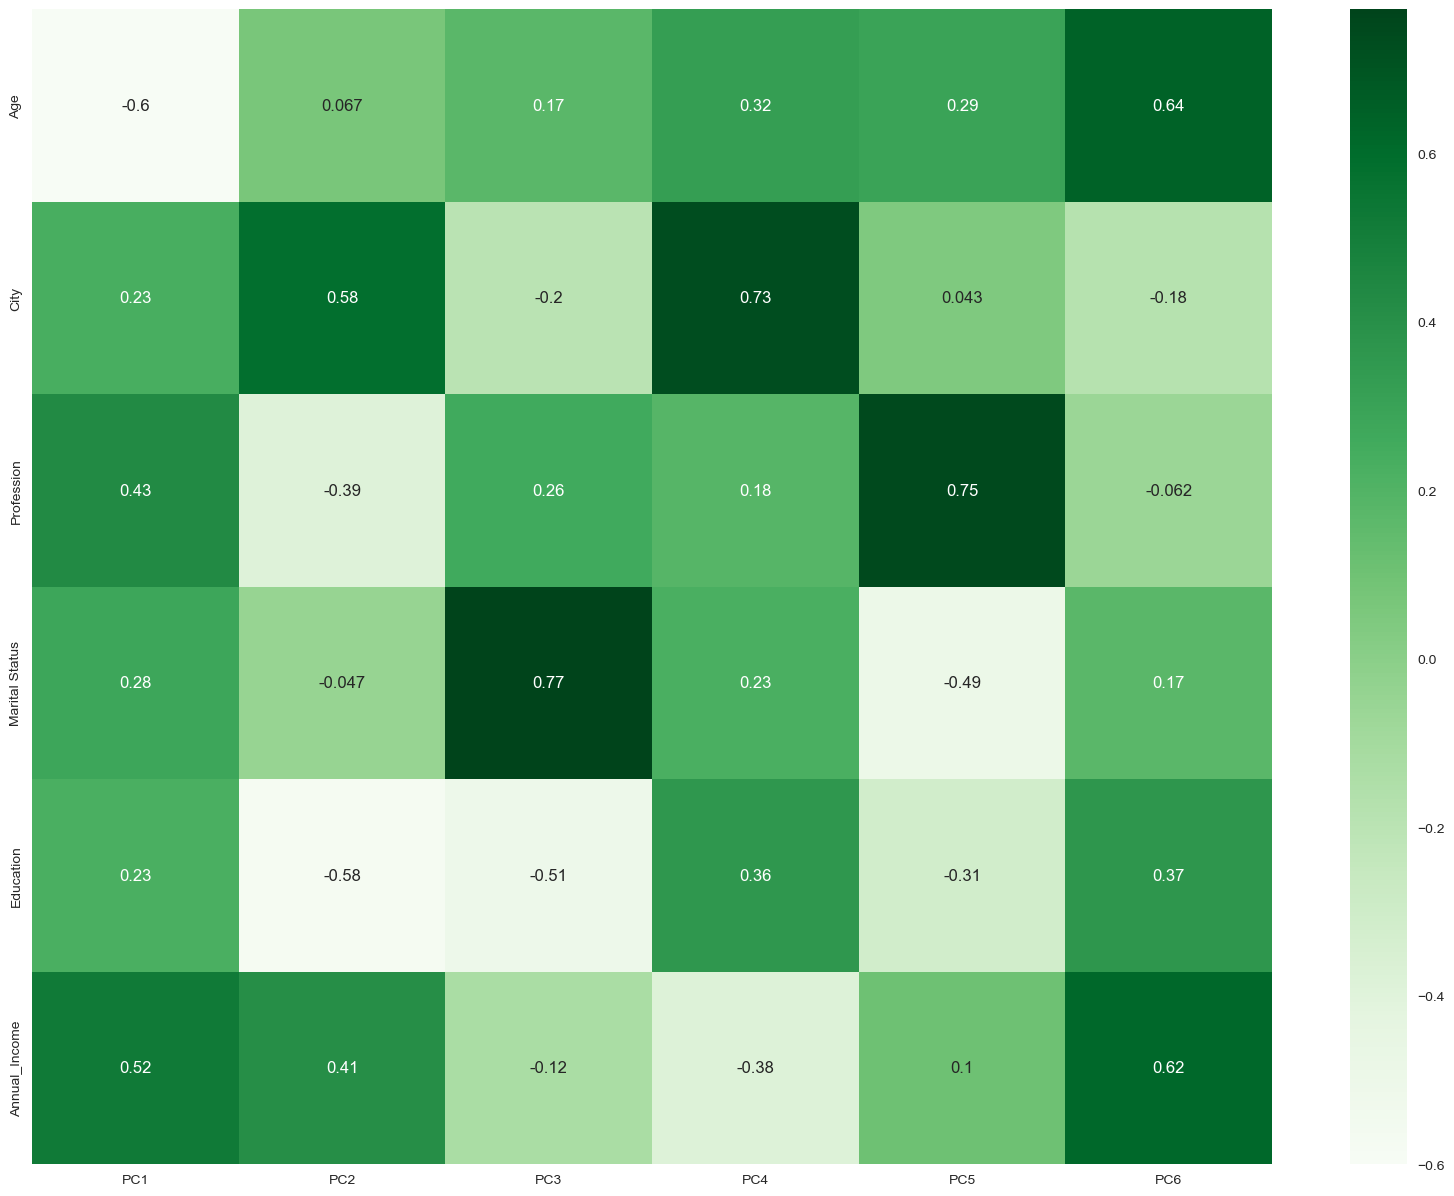

In [94]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(rot_df, annot=True, cmap='Greens')
plt.show()

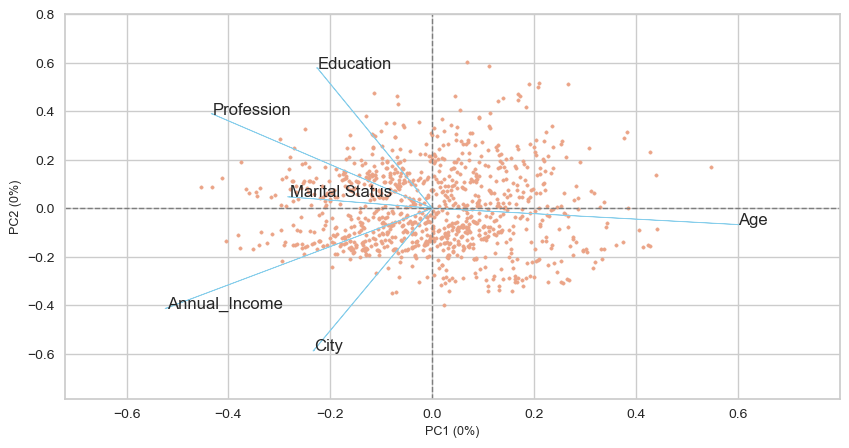

In [95]:
# get PC scores
pca_scores = X_pca
loadings = pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=0,var2=0, show=True,dim=(10,5))

Extracting Segments

K-Means clustering analysis
K-Means clustering is an unsupervised machine learning algorithm that groups data points into k distinct clusters based on their similarity. It's an iterative process that aims to minimize the within-cluster sum of squares, meaning it tries to create clusters where data points within each group are as close as possible to each other and far from points in other groups.This algorithm helps us identify the optimal number of clusters by generating an "elbow curve."

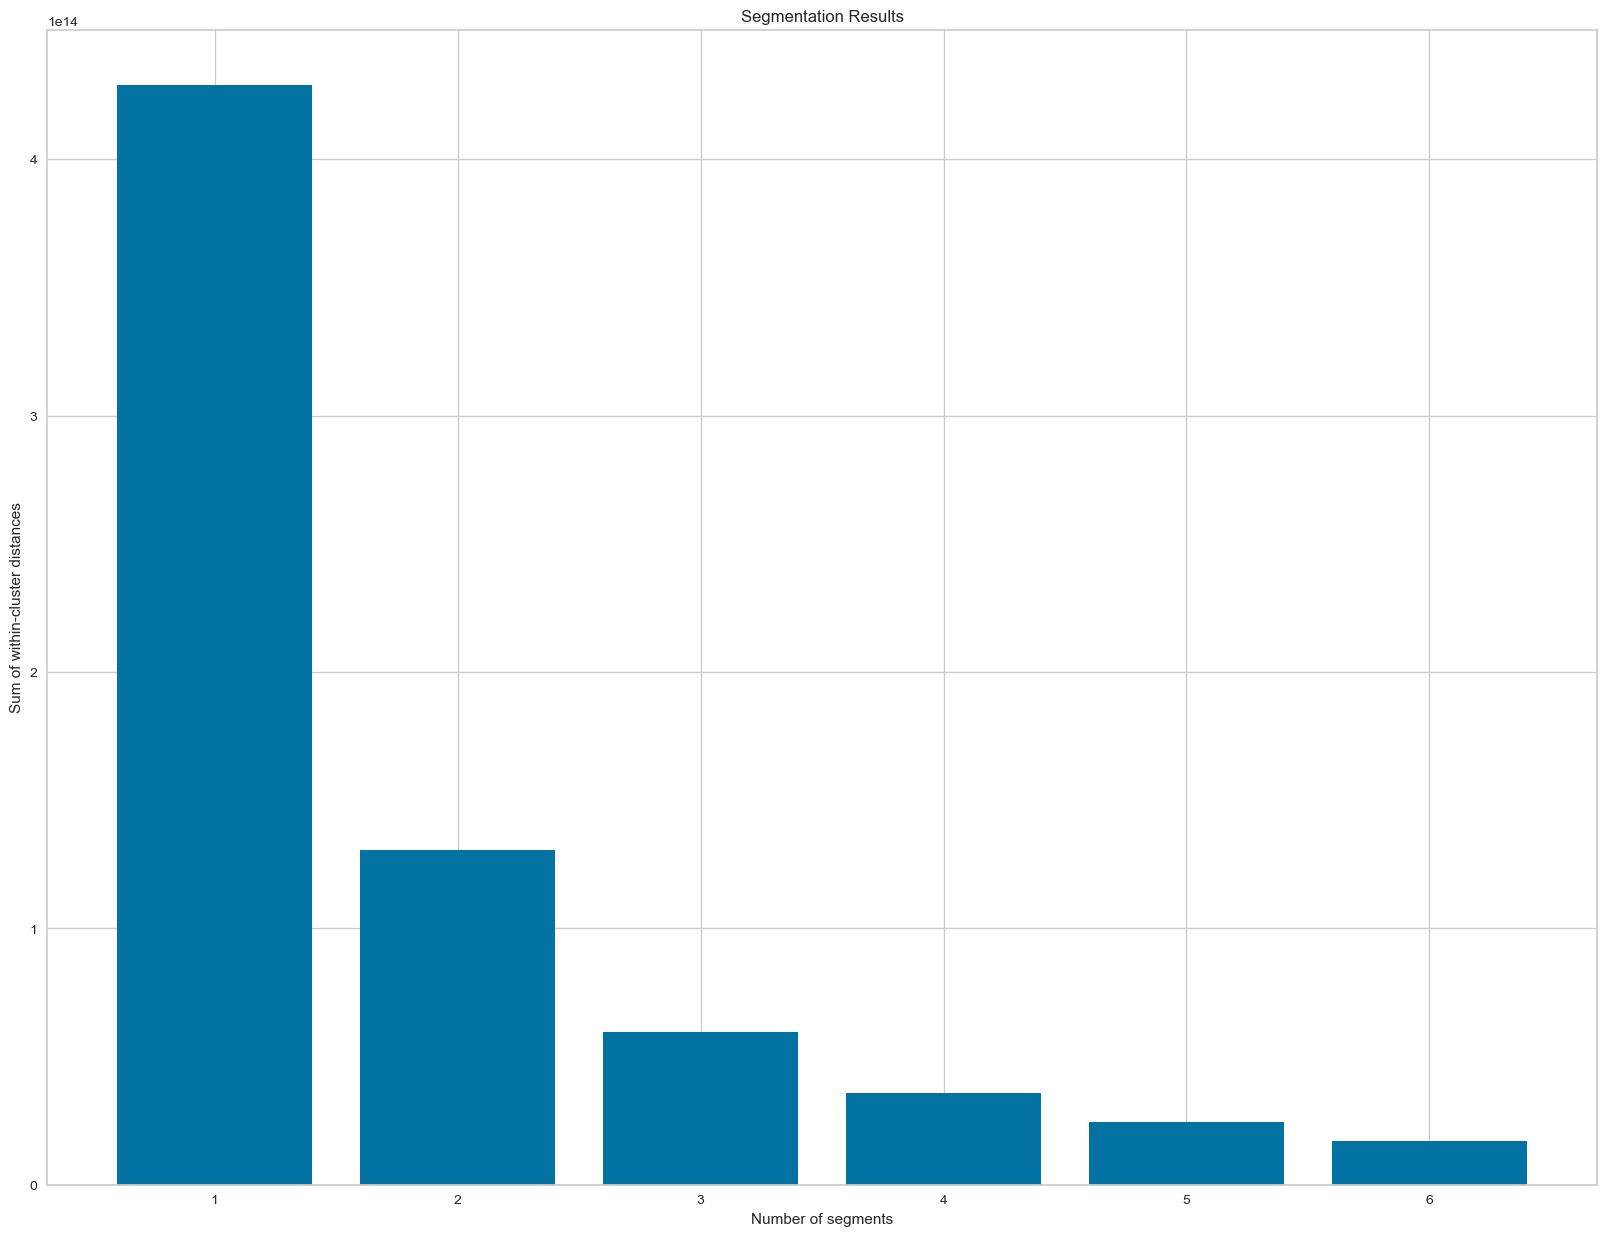

In [98]:
np.random.seed(90)
# Define the number of repetitions for the KMeans clustering algorithm.
nrep = 10
# Define the range of the number of clusters to test (from 1 to 8, excluding 9).
num_segments = range(1, 7)
wcss = []
X_k = {}
for k in num_segments:
  # Create a KMeans object with 'k' clusters, 'n_init' repetitions, and a fixed random seed for reproducibility.
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=90)
    # Fit the KMeans model on the original DataFrame 'X'.
    kmeans.fit(X)
    # Calculate and store the sum of within-cluster distances (inertia) for the current number of clusters.
    wcss.append((kmeans.inertia_))
    # Store the KMeans model in the 'X_k' dictionary, indexed by the number of clusters.
    X_k[str(k)] = kmeans
    # Create a bar plot to visualize the sum of within-cluster distances for different numbers of clusters.
plt.bar(num_segments, wcss)
# Add labels and a title to the plot for better interpretation.
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
# Display the plot showing the relationship between the number of clusters and within-cluster distances.
plt.show()

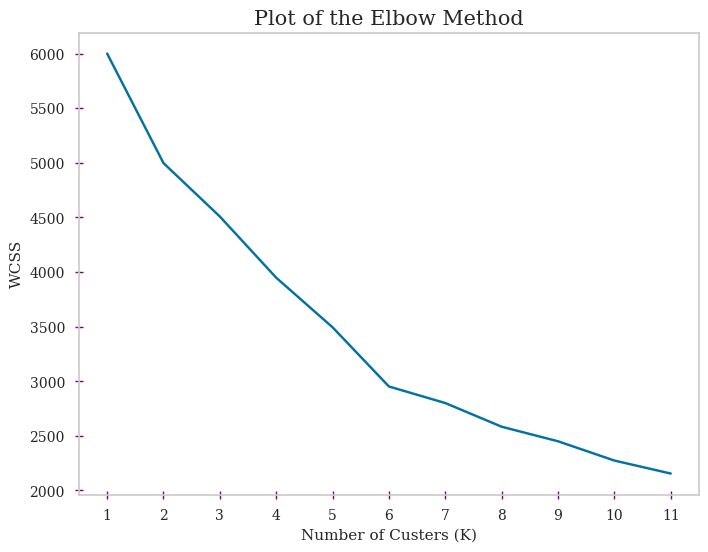

In [99]:
# plotting the results of Elbow

wcss = []

for i in range(1, 12):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 12), wcss)
plt.xticks(range(1, 12), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

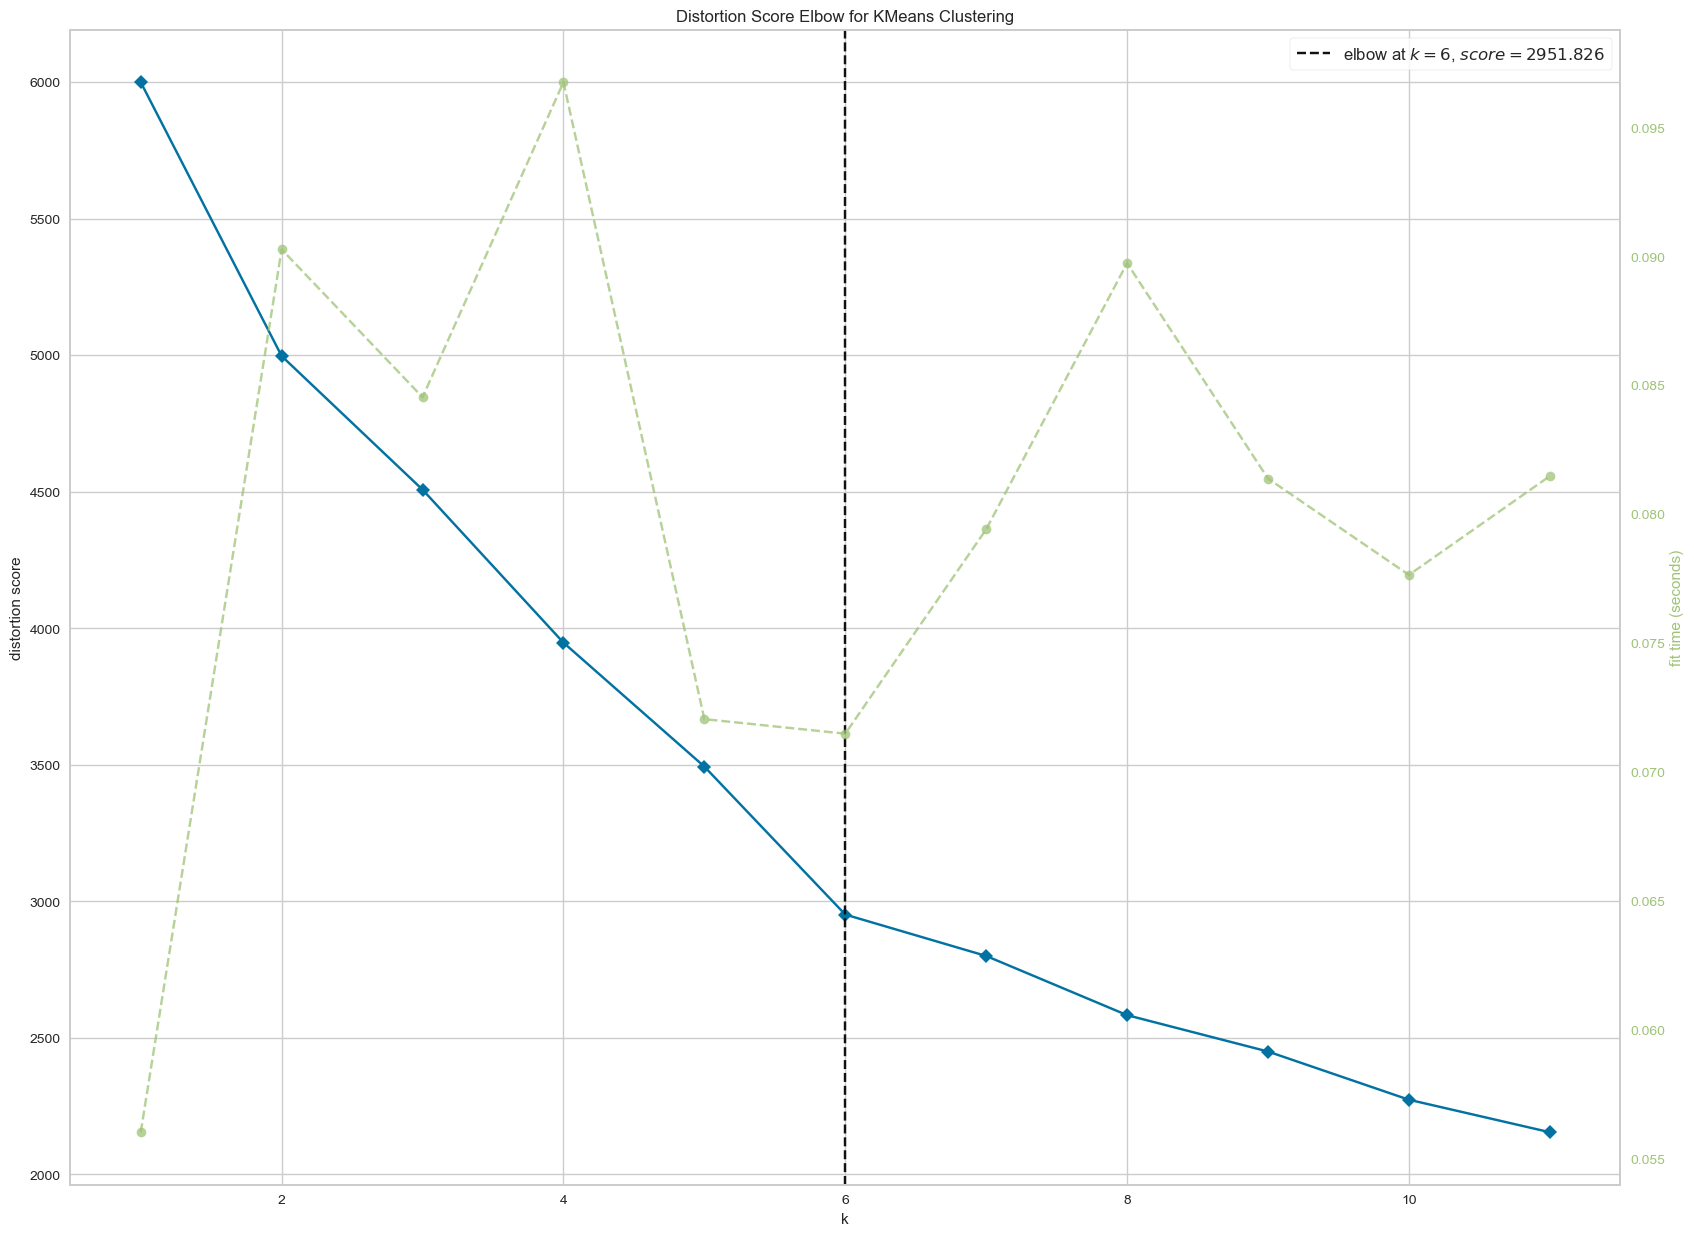

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
model = KMeans(n_clusters=i, init='k-means++', random_state=90)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X_scaled)

# Display the elbow p
visualizer.show()


Based on the elbow method, the optimal number of clusters for the given data is likely k=6. This means that the KMeans algorithm can effectively group the data points into six distinct clusters with minimal distortion.

In [102]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=6,random_state=90)  
df['Cluster'] = kmeans.fit_predict(X_scaled)

# analyze the clusters
print(df['Cluster'].value_counts())

Cluster
2    215
3    186
1    159
4    154
5    150
0    136
Name: count, dtype: int64


In [103]:
#Model Evaluation
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=90).fit(X_scaled)
df['Cluster Number'] = kmeans.labels_ 
# Label assigned for each data point
print (kmeans.labels_) 

# Gives within-cluster sum of squares. 
print (kmeans.inertia_) 

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.n_iter_) 

# Location of the centroids on each cluster.
print(kmeans.cluster_centers_)  

[3 3 3 4 0 0 1 2 3 3 5 1 1 1 2 0 2 2 1 4 1 1 2 1 3 5 4 2 1 2 4 2 3 1 5 5 2
 5 3 1 2 5 3 3 4 3 0 5 3 2 4 3 5 5 4 5 1 3 3 4 5 0 5 4 4 2 0 2 5 0 5 0 0 0
 2 2 4 3 0 2 5 0 0 4 4 3 2 3 3 3 3 2 3 3 4 5 3 2 2 5 4 5 4 1 1 5 2 0 2 2 2
 3 5 2 0 5 1 2 2 1 1 2 3 2 0 3 5 2 1 3 0 5 0 2 5 2 2 4 1 2 3 5 4 2 1 2 1 1
 0 1 1 1 1 0 0 2 2 5 5 3 2 0 0 3 5 0 2 2 5 0 4 5 2 5 2 0 1 2 0 0 2 1 4 1 2
 3 1 5 2 2 3 4 5 0 2 1 5 1 5 2 2 0 2 5 0 0 2 0 2 4 1 0 4 3 2 1 4 3 3 4 5 2
 3 3 5 1 0 0 2 3 2 1 5 3 5 1 0 0 1 3 1 2 0 5 2 2 4 0 4 2 2 2 2 0 4 3 2 1 3
 3 2 3 3 0 3 1 3 2 1 1 5 2 4 3 4 2 0 3 0 4 2 5 3 4 4 1 5 3 5 2 3 1 4 0 1 3
 1 5 0 2 0 3 2 4 3 5 1 5 2 4 0 4 2 4 3 2 2 4 4 0 3 3 0 3 2 2 4 4 2 3 2 3 2
 3 0 2 3 5 5 5 0 0 1 3 5 2 3 3 3 5 3 3 1 4 2 2 3 3 1 0 1 2 2 5 2 3 3 2 4 1
 4 3 0 1 3 1 5 3 2 4 2 3 3 3 3 0 5 4 5 5 4 3 4 5 5 3 1 3 2 4 3 5 2 1 5 1 4
 0 1 1 4 0 3 3 2 5 3 1 0 0 4 1 1 2 5 4 4 5 5 0 3 3 3 5 2 2 0 5 3 2 3 1 4 2
 0 2 2 2 1 5 4 5 0 0 2 2 5 2 2 2 5 2 4 5 4 5 4 5 3 5 0 3 3 1 1 4 0 0 2 2 2
 0 2 1 0 3 1 1 1 3 1 4 2 

Profiling Segments

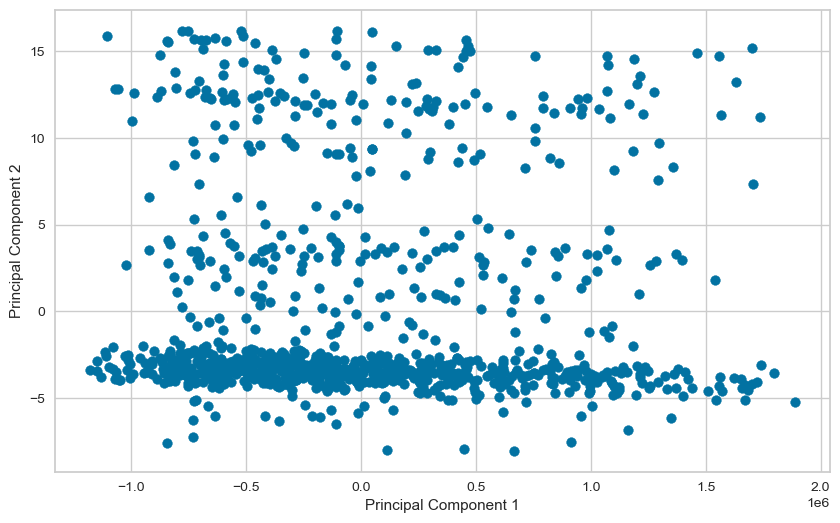

In [105]:

kmeans = KMeans(n_clusters=6,random_state=90)

# Fit the KMeans model on the data 'df'.
# The 'fit' function identifies the cluster centers and assigns data points to their respective clusters.
kmeans.fit(df)

# Create a PCA model with 2 principal components.
# 'n_components=2' specifies that the data should be transformed into a 2-dimensional space.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
# Create a new figure and axis for the scatter plot.
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_pca[:, 0], df_pca[:, 1])

# Set the labels for the x-axis and y-axis.
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Display the plot.
plt.show()

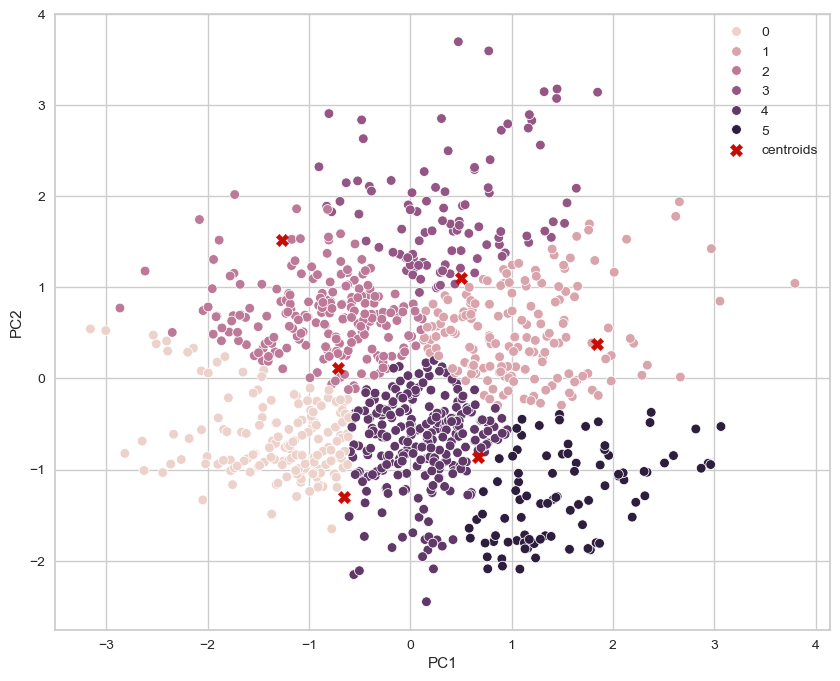

In [106]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=6, random_state=90)
kmeans.fit(X_pca_df)
plt.figure(figsize=(10,8))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [107]:
features = X[['Age', 'City', 'Profession', 'Marital Status', 'Education', 'Annual_Income']]
kmeans = KMeans(n_clusters=6, random_state=90)
X['Segment'] = kmeans.fit_predict(features)
# Analyze the segments
print(X.groupby('Segment').mean())

               Age       City  Profession  Marital Status  Education  \
Segment                                                                
0        27.992201  15.919414    1.560440        0.637363   0.274725   
1        28.245600  15.569343    1.503650        0.627737   0.343066   
2        28.480952  14.380952    1.619048        0.666667   0.333333   
3        28.074781  15.570850    1.696356        0.668016   0.336032   
4        28.690052  15.952880    1.727749        0.581152   0.272251   
5        29.003636  14.936364    1.636364        0.672727   0.327273   

         Annual_Income  
Segment                 
0         2.521751e+06  
1         1.705649e+06  
2         7.025723e+05  
3         2.972029e+06  
4         2.108713e+06  
5         1.215123e+06  


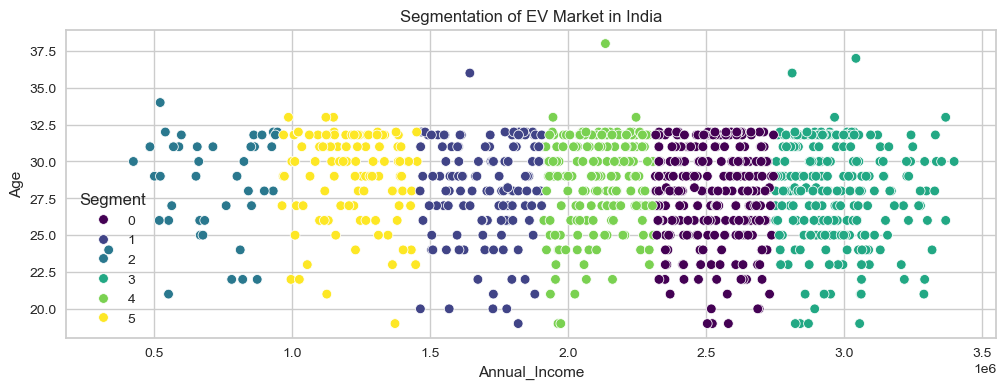

In [108]:
# Plot the segments
plt.figure(figsize = (12,4))
sns.scatterplot(x='Annual_Income', y='Age', hue='Segment', palette='viridis',data=X)
plt.title('Segmentation of EV Market in India')
plt.show()

Target Segments - preference factors

In [110]:
df['Would you prefer replacing all your vehicles to Electronic vehicles?'] = LabelEncoder().fit_transform(category_data['Would you prefer replacing all your vehicles to Electronic vehicles?'])
replace = df.groupby('Cluster Number')['Would you prefer replacing all your vehicles to Electronic vehicles?'].mean()
replace = replace.to_frame().reset_index()
replace

Cluster Number  \
0               0   
1               1   
2               2   
3               3   
4               4   
5               5   

   Would you prefer replacing all your vehicles to Electronic vehicles?  
0                                           1.397059                     
1                                           1.459119                     
2                                           1.446512                     
3                                           1.510753                     
4                                           1.448052                     
5                                           1.500000

In [111]:
#If Yes/Maybe what type of  EV would you prefer?
df['If Yes/Maybe what type of  EV would you prefer?'] = LabelEncoder().fit_transform(category_data['If Yes/Maybe what type of  EV would you prefer?'])
prefer = df.groupby('Cluster Number')['If Yes/Maybe what type of  EV would you prefer?'].mean()
prefer = prefer.to_frame().reset_index()
prefer

Cluster Number  If Yes/Maybe what type of  EV would you prefer?
0               0                                         2.860294
1               1                                         2.698113
2               2                                         2.609302
3               3                                         2.833333
4               4                                         2.733766
5               5                                         2.786667

In [112]:
#Do you think Electronic Vehicles are economical?
df['Do you think Electronic Vehicles are economical?'] = LabelEncoder().fit_transform(category_data['Do you think Electronic Vehicles are economical?'])
economical = df.groupby('Cluster Number')['Do you think Electronic Vehicles are economical?'].mean()
economical = economical.to_frame().reset_index()
economical

Cluster Number  Do you think Electronic Vehicles are economical?
0               0                                          1.720588
1               1                                          1.635220
2               2                                          1.655814
3               3                                          1.634409
4               4                                          1.551948
5               5                                          1.680000

In [113]:
#How much money could you spend on an Electronic vehicle?
df['How much money could you spend on an Electronic vehicle?'] = LabelEncoder().fit_transform(category_data['How much money could you spend on an Electronic vehicle?'])
spend = df.groupby('Cluster Number')['How much money could you spend on an Electronic vehicle?'].mean()
spend = spend.to_frame().reset_index()
spend

Cluster Number  How much money could you spend on an Electronic vehicle?
0               0                                           4.779412       
1               1                                           4.761006       
2               2                                           4.669767       
3               3                                           4.779570       
4               4                                           4.538961       
5               5                                           4.693333

In [114]:
#Which brand of vehicle do you currently own?
df['Which brand of vehicle do you currently own?'] = LabelEncoder().fit_transform(category_data['Which brand of vehicle do you currently own?'])
own = df.groupby('Cluster Number')['Which brand of vehicle do you currently own?'].mean()
own = own.to_frame().reset_index()
own

Cluster Number  Which brand of vehicle do you currently own?
0               0                                      7.816176
1               1                                      7.301887
2               2                                      8.200000
3               3                                      7.822581
4               4                                      7.740260
5               5                                      7.653333

In [115]:
wheels = df.groupby('Cluster Number')['Preference for wheels in EV'].mean()
wheels = wheels.to_frame().reset_index()
wheels

Cluster Number  Preference for wheels in EV
0               0                     3.294118
1               1                     3.377358
2               2                     3.348837
3               3                     3.419355
4               4                     3.240260
5               5                     3.393333

In [116]:
age = df.groupby('Cluster Number')['Age'].mean()
age = age.to_frame().reset_index()
age

Cluster Number        Age
0               0  24.970588
1               1  28.573585
2               2  28.190917
3               3  30.401456
4               4  28.569138
5               5  28.385491

In [117]:
income = df.groupby('Cluster Number')['Annual_Income'].mean()
income = income.to_frame().reset_index()
income

Cluster Number  Annual_Income
0               0   2.627459e+06
1               1   2.238095e+06
2               2   2.202125e+06
3               3   2.029656e+06
4               4   2.180853e+06
5               5   2.147488e+06

In [118]:
df['City'] = LabelEncoder().fit_transform(category_data['City'])
city = df.groupby('Cluster Number')['City'].mean()
city = city.to_frame().reset_index()
city

Cluster Number       City
0               0  17.838235
1               1  18.245283
2               2  17.916279
3               3  17.806452
4               4  16.811688
5               5   3.593333

   Cluster Number  \
0               0   
1               1   
2               2   
3               3   
4               4   
5               5   

   Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                           1.397059                      
1                                           1.459119                      
2                                           1.446512                      
3                                           1.510753                      
4                                           1.448052                      
5                                           1.500000                      

   If Yes/Maybe what type of  EV would you prefer?        Age  
0                                         2.860294  24.970588  
1                                         2.698113  28.573585  
2                                         2.609302  28.190917  
3                                         2.833333  30.401456  
4     

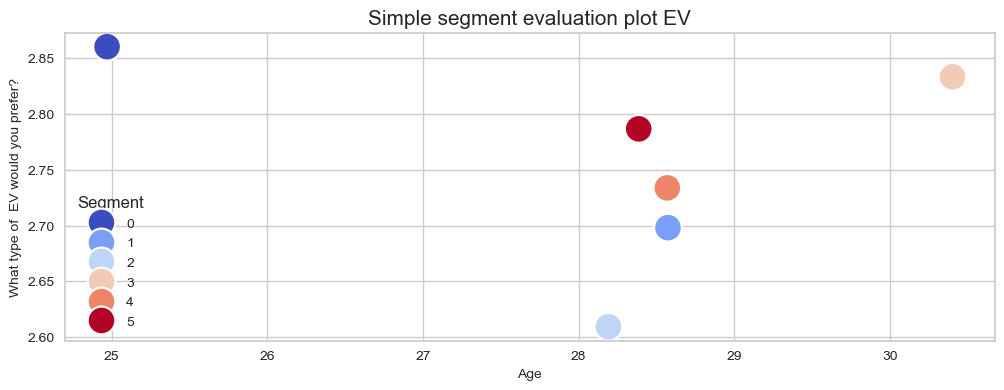

In [119]:
segment = replace.merge(prefer, on='Cluster Number', how='left').merge(age, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="Age", y="If Yes/Maybe what type of  EV would you prefer?", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot EV", fontsize=15)
plt.xlabel("Age", fontsize=10)
plt.ylabel("What type of  EV would you prefer?", fontsize=10)
plt.legend(title='Segment')
plt.show()

The data points are concentrated in 4th part of the graph, suggesting that there is a unity in terms of both type of EVs and prefer to replacing the  EVs across the identified segments.Most of the age groups prefer to buy SUVs compared to other models when they like to replace their vehicles to EV.

   Cluster Number  \
0               0   
1               1   
2               2   
3               3   
4               4   
5               5   

   Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                           1.397059                      
1                                           1.459119                      
2                                           1.446512                      
3                                           1.510753                      
4                                           1.448052                      
5                                           1.500000                      

   Annual_Income  How much money could you spend on an Electronic vehicle?  
0   2.627459e+06                                           4.779412         
1   2.238095e+06                                           4.761006         
2   2.202125e+06                                           4.669767         
3   2.029656e+06  

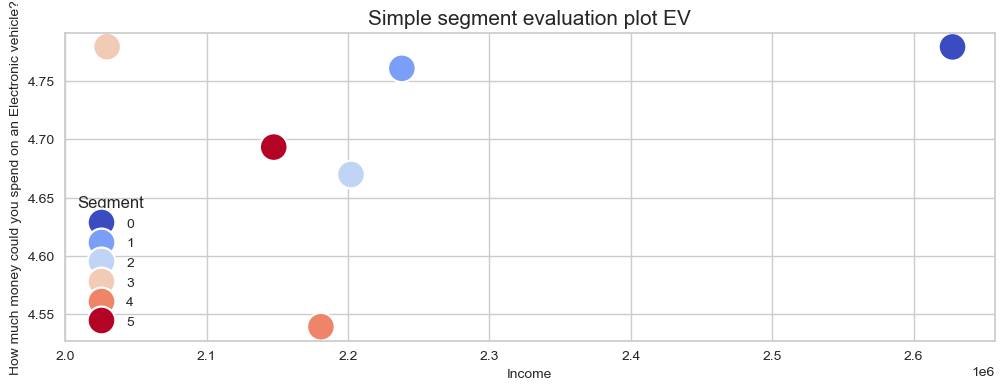

In [121]:
segment = replace.merge(income, on='Cluster Number', how='left').merge(spend, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="Annual_Income", y="How much money could you spend on an Electronic vehicle?", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot EV", fontsize=15)
plt.xlabel("Income", fontsize=10)
plt.ylabel("How much money could you spend on an Electronic vehicle?", fontsize=10)
plt.legend(title='Segment')
plt.show()

The data points are concentrated in 2nd part of the graph, most middle class customers ready to spend less than 15 lakhs for their next EV.

   Cluster Number  Do you think Electronic Vehicles are economical?  \
0               0                                          1.720588   
1               1                                          1.635220   
2               2                                          1.655814   
3               3                                          1.634409   
4               4                                          1.551948   
5               5                                          1.680000   

        City  Which brand of vehicle do you currently own?  
0  17.838235                                      7.816176  
1  18.245283                                      7.301887  
2  17.916279                                      8.200000  
3  17.806452                                      7.822581  
4  16.811688                                      7.740260  
5   3.593333                                      7.653333  


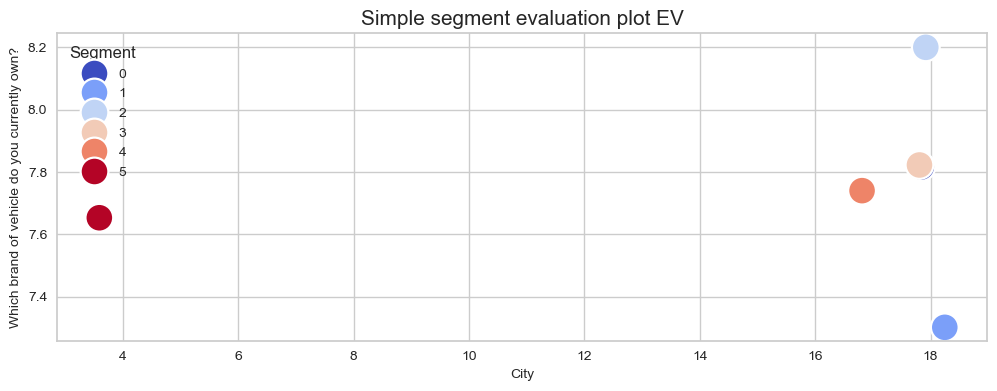

In [123]:
segment = economical.merge(city, on='Cluster Number', how='left').merge(own, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="City", y="Which brand of vehicle do you currently own?", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot EV", fontsize=15)
plt.xlabel("City", fontsize=10)
plt.ylabel("Which brand of vehicle do you currently own?", fontsize=10)
plt.legend(title='Segment')
plt.show()

The data points are concentrated in one place.The most people have cars are from Pune city and they most ecnomical cars are Kia and Tata vehicles.

#dataset 2

In [126]:
df1.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations'],
      dtype='object')

In [127]:
X1=df1.drop('State Name',axis=1)
X1

Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
0             1             30            81               0   
1            14              0             5               0   
2           721          47041           161               7   
3          5003          59079           114              11   
4           298           1410           182               0   
5          6424           5341           117            1077   
6         14730         112831          3051              49   
7          1314             28           289              13   
8         13662           1869          1309              28   
9          7777          18595           186             122   
10          368            167            37               7   
11         1417             43            10               6   
12         2961           8986           139              24   
13        56737          16478          7212             153   
14        10299           2115          2524              43   
15           12              0          5484               0   
16        51149           6155             2              30   
17           86            443             9               1   
18           16              6             3               3   
19            9              1             4               2   
20           44              0           121               3   
21        10329           1808            75              21   
22         1429             32           124               9   
23         6408           2878           798              35   
24        23446          29631            12              25   
25            1              0          2414               1   
26        44302           4470            13            1281   
27           67           7510            14               1   
28           69             36           153               2   
29        18295         257159           368              53   
30         2614          22096           709               1   
31         2540          40948           615              28   

    Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses  \
0                       40                          0                  0   
1                        0                          0                  0   
2                       15                          0                  0   
3                       26                          0                  0   
4                       40                          0                  0   
5                        1                          0                  0   
6                       39                          0                  0   
7                       36                          2                  0   
8                      278                        344                  0   
9                        8                          2                  0   
10                      86                          0                  0   
11                      43                          0                  0   
12                       4                          0                  0   
13                      44                          1                  1   
14                      23                          0                  1   
15                       0                          0                  0   
16                     851                         26                  1   
17                       0                          0                  0   
18                       0                          0                  0   
19                       1                          0                  0   
20                       0                          1                  0   
21                       0                         25                  0   
22                      20                          0                  0   
23                       2                          0              

In [128]:
# feature scaling
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [129]:
# applying Principle Component Analysis (PCA)
pca1 = PCA(n_components=11)
X1_pca = pca1.fit_transform(X1_scaled)
df1_pca = pd.DataFrame(X1_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'])
df1_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.335355 -0.232207 -0.134595  0.131703 -0.129024 -0.227183 -0.262417   
1 -1.389557 -0.204782 -0.123393  0.033367 -0.133194 -0.258961 -0.135789   
2 -0.727220 -0.793931  0.775173 -0.139211  0.025396  0.006348  0.057850   
3 -0.405672 -0.908574  1.025144 -0.134785  0.026972  0.006846  0.149594   
4 -1.306640 -0.250598 -0.124592  0.099759 -0.104445 -0.202280 -0.241454   

        PC8       PC9      PC10          PC11  
0 -0.011222  0.066201 -0.176722  1.046568e-16  
1 -0.145794  0.057424 -0.014632  7.116639e-17  
2 -0.051719  0.072140 -0.059010  6.422611e-18  
3  0.013341  0.302655 -0.066319  1.821202e-17  
4  0.039820  0.075822 -0.178191 -2.771812e-17

In [130]:
PCAsummary1 = pd.DataFrame({'Standard Deviation':df1_pca.std(),
                           'Proportion of Variance': pca1.explained_variance_ratio_,
                           'Cumultive Proportion': pca1.explained_variance_ratio_.cumsum()})
PCAsummary1

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1         1.980474e+00            3.454277e-01              0.345428
PC2         1.342432e+00            1.587098e-01              0.504137
PC3         1.269827e+00            1.420065e-01              0.646144
PC4         1.184128e+00            1.234855e-01              0.769630
PC5         1.005743e+00            8.908272e-02              0.858712
PC6         8.406427e-01            6.223604e-02              0.920948
PC7         6.689100e-01            3.940528e-02              0.960354
PC8         5.390014e-01            2.558579e-02              0.985939
PC9         3.451548e-01            1.049172e-02              0.996431
PC10        2.013074e-01            3.568935e-03              1.000000
PC11        2.852955e-17            7.170049e-35              1.000000

In [131]:
df1_p=pca1.fit(X1_scaled)
# correlation coefficient between original variables and the component
index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8', 'PC9','PC10','PC11']
rot_matrix1 = df1_p.components_.T
rot_df1 = pd.DataFrame(rot_matrix1, index=X1.columns.values, columns=index)
rot_df1=round(-rot_df1,3)
rot_df1

PC1    PC2    PC3    PC4    PC5    PC6  \
Two Wheeler                    -0.448 -0.204  0.123 -0.047  0.085  0.230   
Three Wheeler                  -0.255  0.373 -0.545  0.100 -0.082 -0.176   
Four Wheeler                   -0.226  0.000  0.358  0.489 -0.386 -0.235   
Goods Vehicles                 -0.105 -0.632 -0.300  0.070  0.060  0.167   
Public Service Vehicle         -0.325  0.061  0.003 -0.558  0.105  0.005   
Special Category Vehicles      -0.056 -0.055  0.140 -0.534 -0.691 -0.242   
Ambulance/Hearses              -0.248  0.005  0.317 -0.028  0.523 -0.663   
Construction Equipment Vehicle  0.028 -0.565 -0.331  0.044 -0.102 -0.486   
Other                          -0.382 -0.045  0.176  0.340 -0.219  0.158   
Grand Total                    -0.368  0.278 -0.451  0.093 -0.065 -0.103   
total-charging-stations        -0.469 -0.120  0.078 -0.141  0.092  0.251   

                                  PC7    PC8    PC9   PC10   PC11  
Two Wheeler                    -0.213 -0.201 -0.729 -0.151  0.201  
Three Wheeler                  -0.092  0.039  0.082  0.025  0.659  
Four Wheeler                   -0.046 -0.570  0.225  0.002  0.022  
Goods Vehicles                 -0.407 -0.050  0.284  0.462  0.004  
Public Service Vehicle          0.484 -0.410  0.126  0.387  0.002  
Special Category Vehicles      -0.312  0.235 -0.028  0.029  0.001  
Ambulance/Hearses              -0.232  0.226  0.036  0.131  0.000  
Construction Equipment Vehicle  0.452 -0.007 -0.148 -0.310  0.001  
Other                           0.411  0.577 -0.071  0.354  0.005  
Grand Total                    -0.141 -0.035 -0.120 -0.013 -0.725  
total-charging-stations        -0.006  0.150  0.521 -0.612  0.000

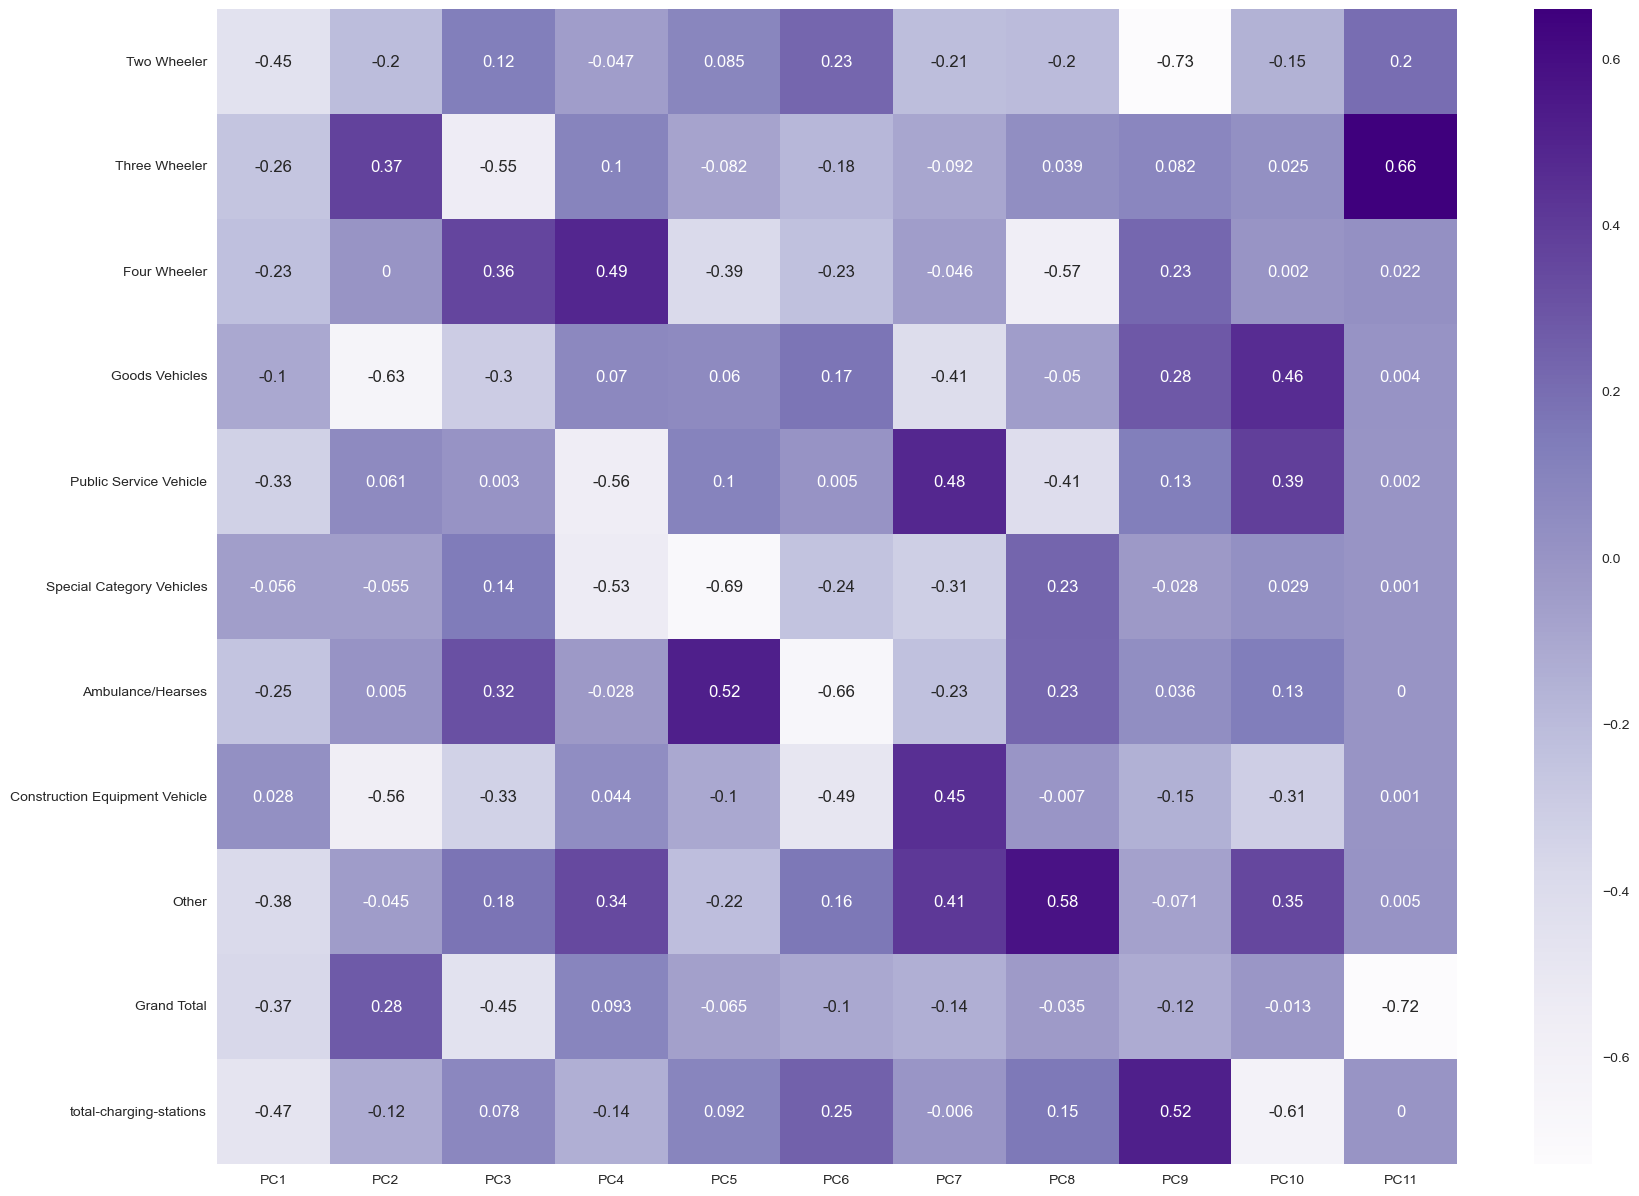

In [132]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(rot_df1, annot=True, cmap='Purples')
plt.show()

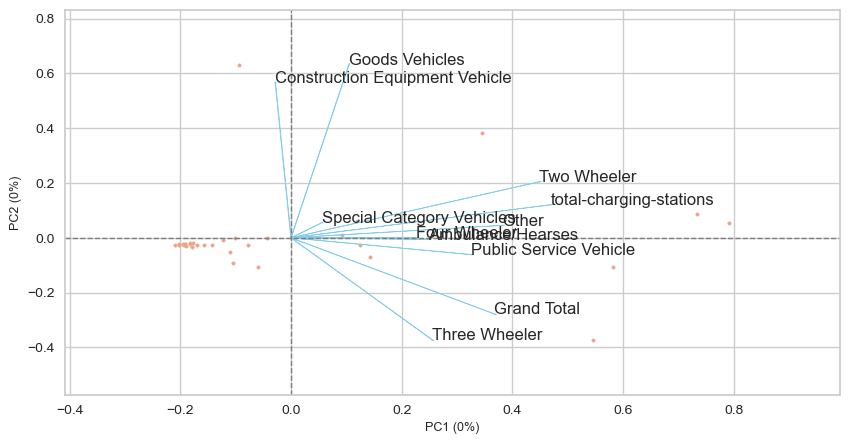

In [133]:
# get PC scores
pca1_scores = X1_pca
loadings = pca1.components_
# get 2D biplot
cluster.biplot(cscore=pca1_scores, loadings=loadings, labels=X1.columns.values, var1=0,var2=0, show=True,dim=(10,5))

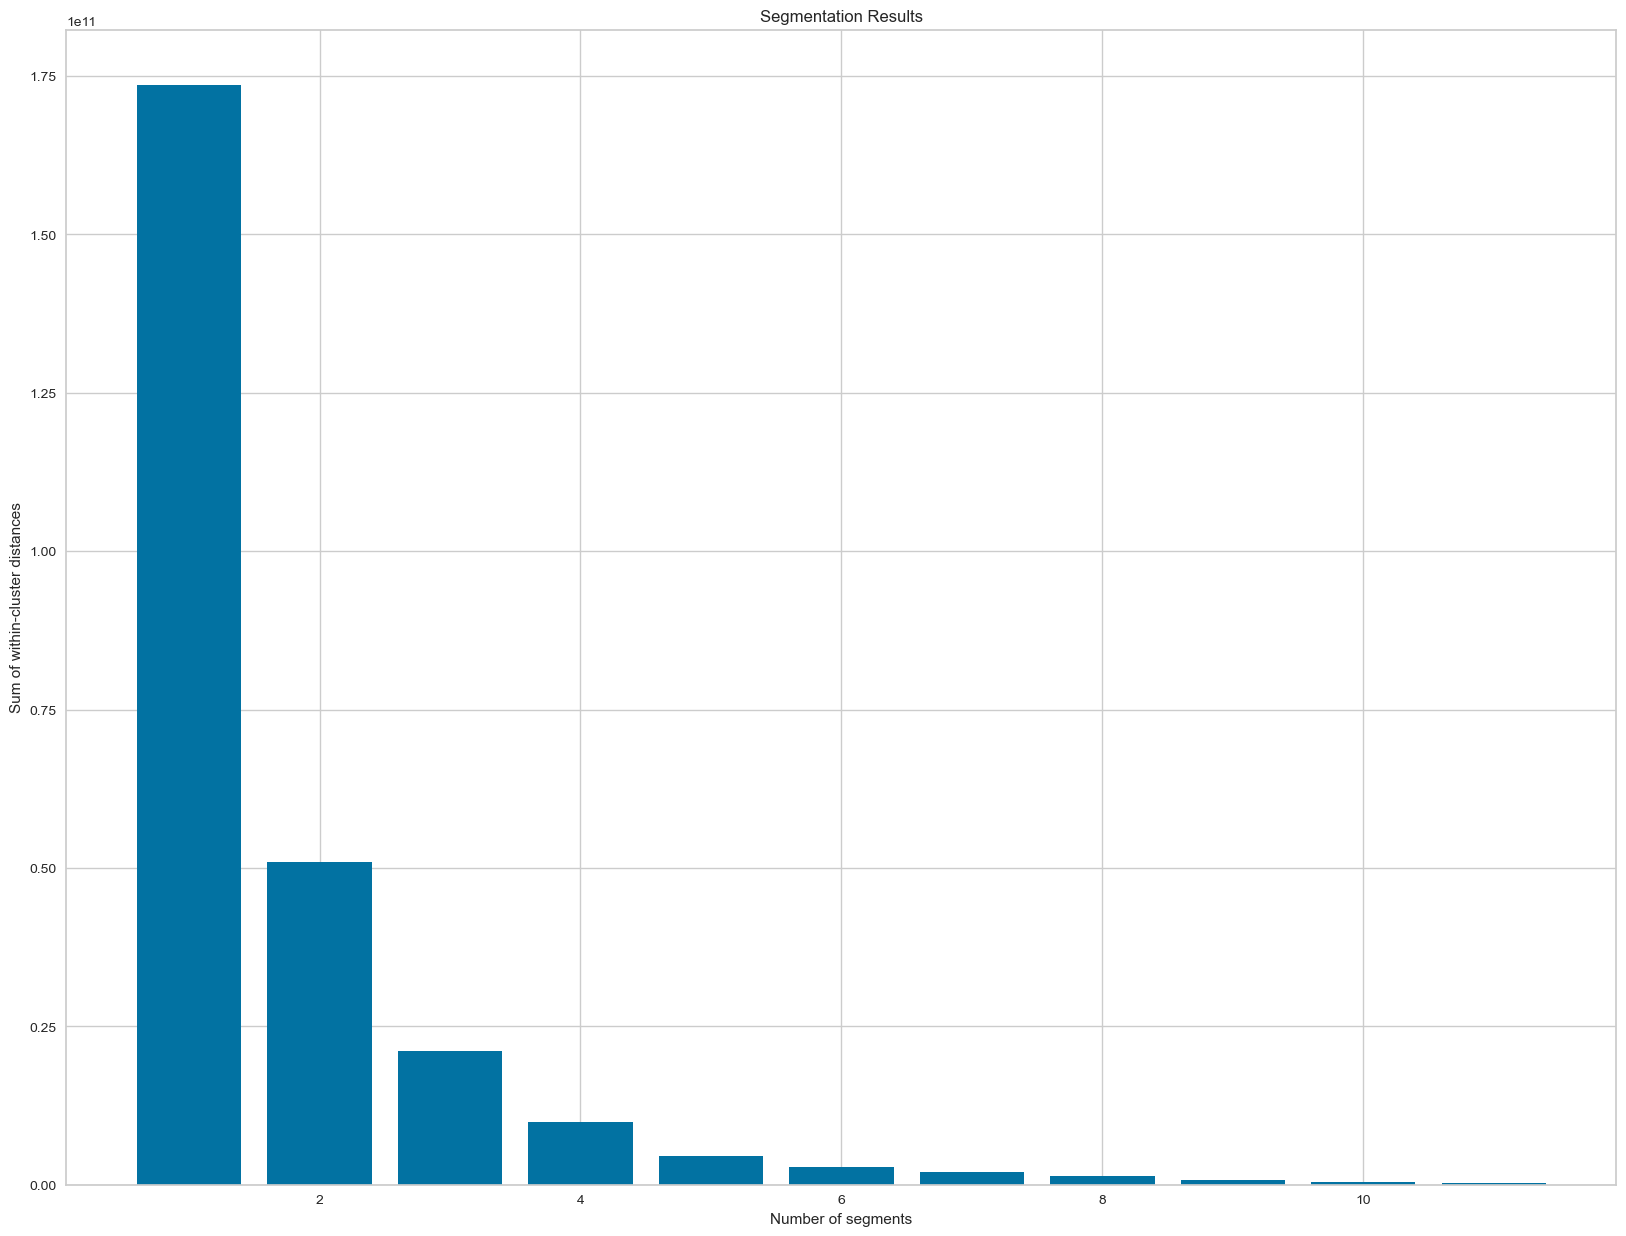

In [134]:
np.random.seed(0)
nrep = 11
num_segments = range(1, 12)
wcss1 = []
X1_k = {}
for k in num_segments:
  # Create a KMeans object with 'k' clusters, 'n_init' repetitions, and a fixed random seed for reproducibility.
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=0)
    # Fit the KMeans model on the original DataFrame 'X1'.
    kmeans.fit(X1)
    # Calculate and store the sum of within-cluster distances (inertia) for the current number of clusters.
    wcss1.append((kmeans.inertia_))
    # Store the KMeans model in the 'X1_k' dictionary, indexed by the number of clusters.
    X1_k[str(k)] = kmeans
    # Create a bar plot to visualize the sum of within-cluster distances for different numbers of clusters.
plt.bar(num_segments, wcss1)
# Add labels and a title to the plot for better interpretation.
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
# Display the plot showing the relationship between the number of clusters and within-cluster distances.
plt.show()

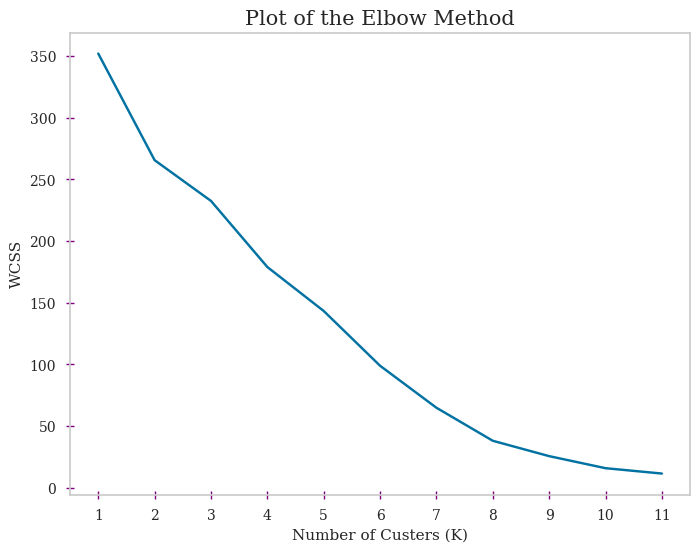

In [135]:
# plotting the results of Elbow

wcss1 = []

for i in range(1, 12):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmean.fit(X1_pca)
  wcss1.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 12), wcss1)
plt.xticks(range(1, 12), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

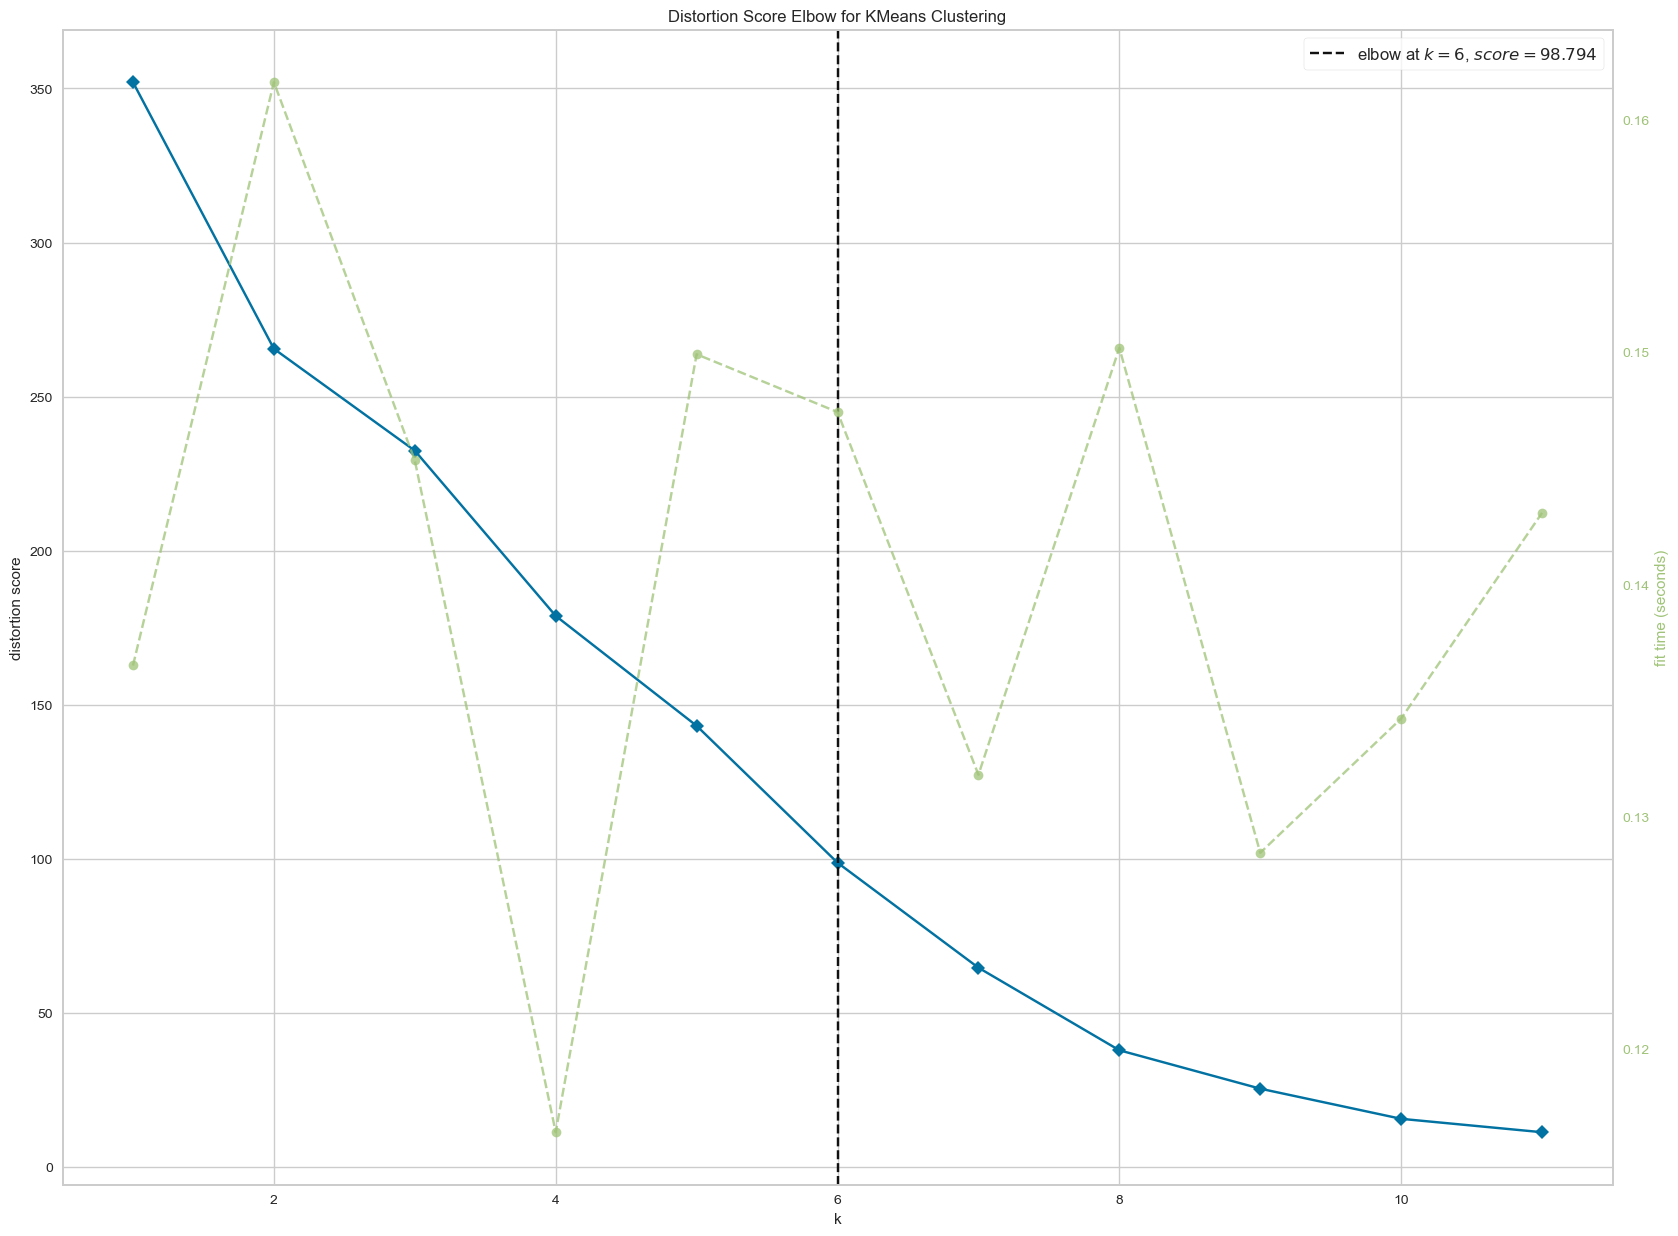

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
model1 = KMeans(n_clusters=i, init='k-means++', random_state=0)
visualizer1 = KElbowVisualizer(model1, k=(1, 12))
visualizer1.fit(X1_scaled)

# Display the elbow p
visualizer1.show()

Based on the elbow method, the optimal number of clusters for the given data is likely k=6. This means that the KMeans algorithm can effectively group the data points into six distinct clusters with minimal distortion.

In [138]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=6,random_state=0)  
df1['Cluster'] = kmeans.fit_predict(X1_scaled)

# analyze the clusters
print(df1['Cluster'].value_counts())

Cluster
0    26
2     2
5     1
4     1
1     1
3     1
Name: count, dtype: int64


In [139]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(X1_scaled)
df1['Cluster Number'] = kmeans.labels_ 
# Label assigned for each data point
print (kmeans.labels_) 

# Gives within-cluster sum of squares. 
print (kmeans.inertia_) 

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.n_iter_) 

# Location of the centroids on each cluster.
print(kmeans.cluster_centers_)  

[0 0 0 0 0 5 2 0 4 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
98.7939384466855
2
[[-0.28089372 -0.22068496 -0.16748348 -0.11151864 -0.28011108 -0.19044727
  -0.07260614 -0.19196737 -0.30938183 -0.28770908 -0.29717121]
 [ 2.86121751 -0.28988376 -0.50201829 -0.22918558  4.95270203  0.22051366
   1.75291964 -0.19376953  1.24770795  0.53621511  3.50341307]
 [ 1.81897851  0.91541706  2.63464532  0.02163795 -0.13977578 -0.20588242
   0.67419986 -0.19376953  3.69934462  1.44237546  1.76348314]
 [ 0.63996487  4.88170449 -0.27821112 -0.14793289  1.65627415 -0.1808003
  -0.40451992 -0.19376953 -0.33642652  4.60993611  0.6489658 ]
 [ 0.32672862 -0.37819083  0.29720568 -0.23625103  1.34802039  5.53792356
  -0.40451992  0.21231674 -0.16400372 -0.23621075  0.50463982]
 [-0.16263117 -0.3066551  -0.43169636  3.46957827 -0.39455694 -0.21424313
  -0.40451992  5.55391299 -0.10203927 -0.31425534 -0.45753342]]


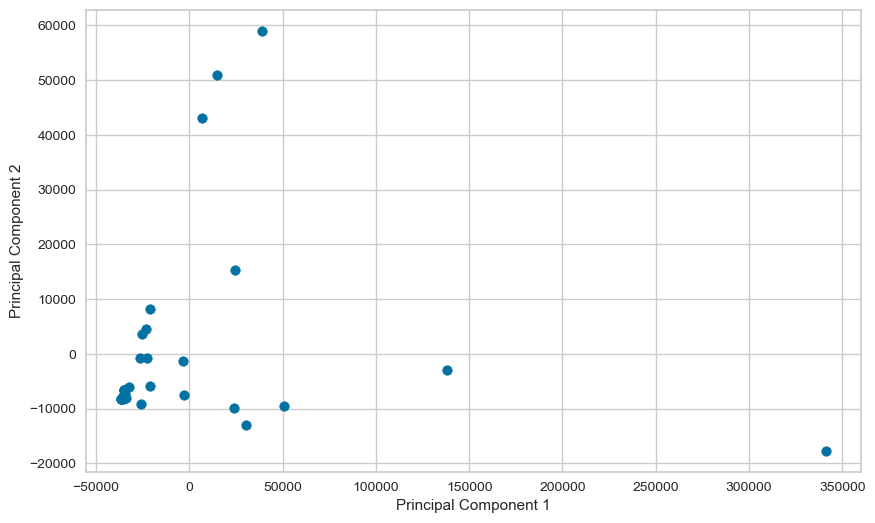

In [140]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(X1)
pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1)
# Create a new figure and axis for the scatter plot.
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X1_pca[:, 0], X1_pca[:, 1])
# Set the labels for the x-axis and y-axis.
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Display the plot.
plt.show()

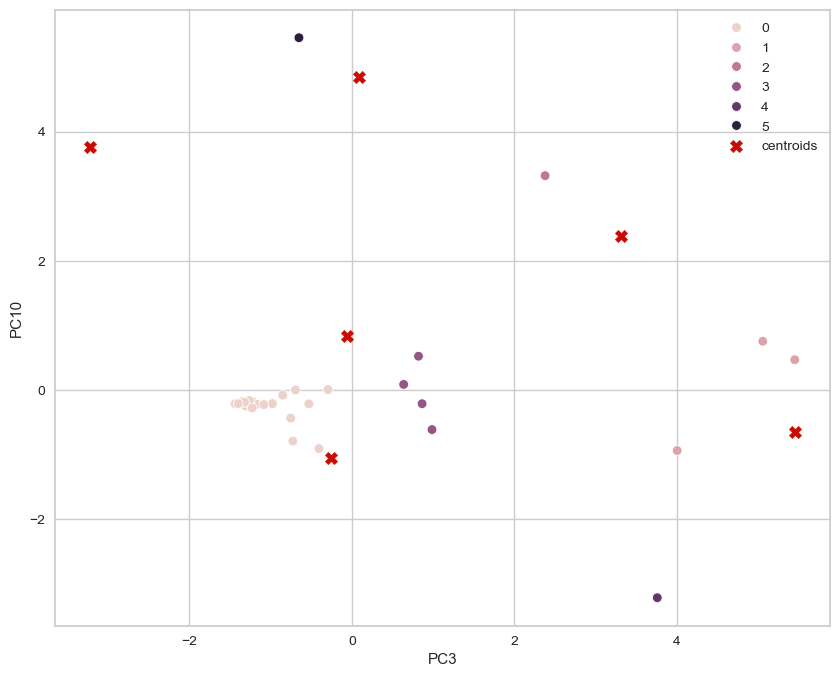

In [141]:
pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1_scaled)

# Convert PCA results to DataFrame
X1_pca_df = pd.DataFrame(data=X1_pca, columns=['PC3', 'PC10'])
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X1_pca_df)
plt.figure(figsize=(10,8))
sns.scatterplot(data=X1_pca_df, x="PC3", y="PC10", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

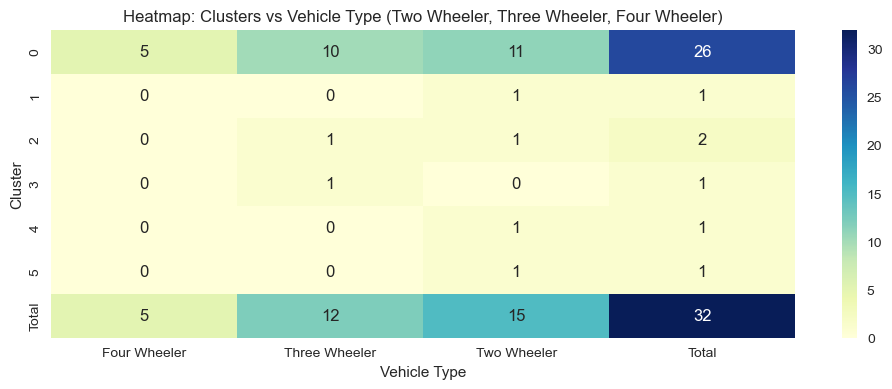

In [142]:
finalcolumns = ['Two Wheeler','Three Wheeler','Four Wheeler','Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'Cluster', 'Cluster Number']
selected_features = df1[finalcolumns]
selected_features['Vehicle Type'] = selected_features[['Two Wheeler','Three Wheeler','Four Wheeler']].idxmax(axis=1)
heatmapData = pd.crosstab(selected_features['Cluster'], selected_features['Vehicle Type'], margins=True, margins_name='Total')
plt.figure(figsize = (12,4))
sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Two Wheeler, Three Wheeler, Four Wheeler)')
plt.show()

Based on the above heatmap, here are some observations:

Cluster 0: This cluster is dominated b2 Wheeler vehicleses, with a significantly higher count compared tThree Wheeler,Four Wheeler vehicles.s.
Cluster 1: This cluster honly Two Wheeler.es.
Cluster 2: This clusterhaving only 2 wheeler and 3 wheelertrol vehicles.
Cluster 3: This cluis only have ae3 wheeler trol vei
Cluster 4: This cluster is only have a 2 wheeler vehicle.
Cluster 5: This cluster is only have a 2 wheeler vehicle.cles.

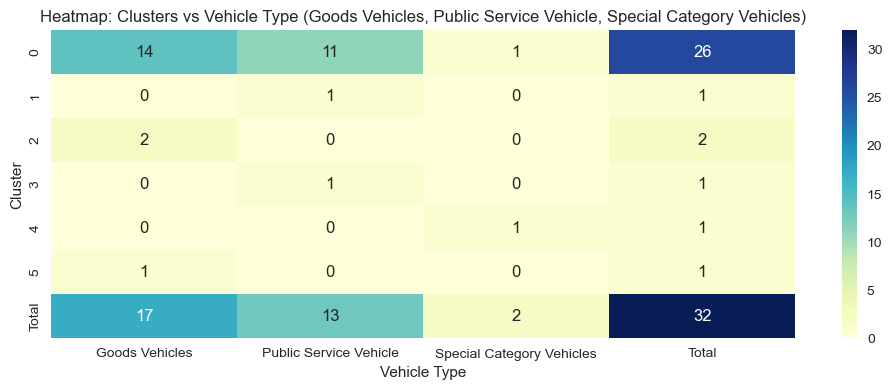

In [144]:
finalcolumns = ['Two Wheeler','Three Wheeler','Four Wheeler','Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'Cluster', 'Cluster Number']
selected_features = df1[finalcolumns]
selected_features['Vehicle Type'] = selected_features[['Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles']].idxmax(axis=1)
heatmapData = pd.crosstab(selected_features['Cluster'], selected_features['Vehicle Type'], margins=True, margins_name='Total')
plt.figure(figsize = (12,4))
sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Goods Vehicles, Public Service Vehicle, Special Category Vehicles)')
plt.show()

Based on the above heatmap, here are some observations:

Cluster 0: This cluster is dominated by Goods Vehicles, with a significantly higher count compared to Special Category Vehicles.
Cluster 1: This cluster has only Public Service Vehicle.
Cluster 2: This cluster is having only Goods Vehicles.
Cluster 3: This cluster is only have a Public Service Vehicle.
Cluster 4: This cluster is only have a Special Category Vehicle.
Cluster 5: This cluster is only have a Goods Vehicle.

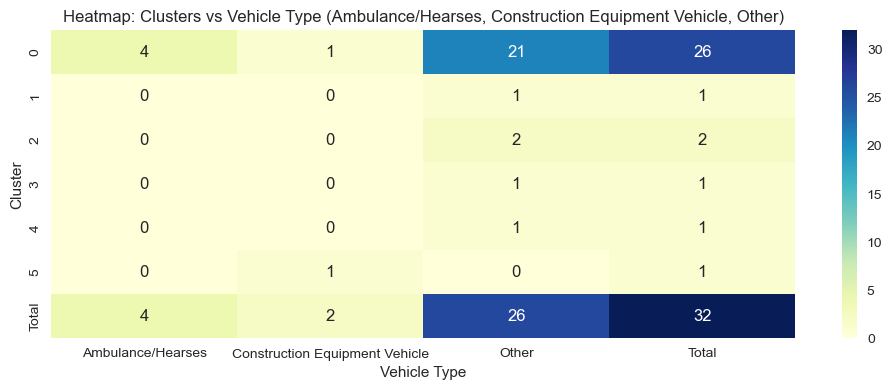

In [146]:
finalcolumns = ['Two Wheeler','Three Wheeler','Four Wheeler','Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'Cluster', 'Cluster Number']
selected_features = df1[finalcolumns]
selected_features['Vehicle Type'] = selected_features[['Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']].idxmax(axis=1)
heatmapData = pd.crosstab(selected_features['Cluster'], selected_features['Vehicle Type'], margins=True, margins_name='Total')
plt.figure(figsize = (12,4))
sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Ambulance/Hearses, Construction Equipment Vehicle, Other)')
plt.show()

In [147]:
two_wheeler = df1.groupby('Cluster Number')['Two Wheeler'].mean()
two_wheeler = two_wheeler.to_frame().reset_index()
two_wheeler

Cluster Number   Two Wheeler
0               0   4674.807692
1               1  51149.000000
2               2  35733.500000
3               3  18295.000000
4               4  13662.000000
5               5   6424.000000

In [148]:
three_wheeler = df1.groupby('Cluster Number')['Three Wheeler'].mean()
three_wheeler = three_wheeler.to_frame().reset_index()
three_wheeler

Cluster Number  Three Wheeler
0               0    9513.576923
1               1    6155.000000
2               2   64654.500000
3               3  257159.000000
4               4    1869.000000
5               5    5341.000000

In [149]:
four_wheeler = df1.groupby('Cluster Number')['Four Wheeler'].mean()
four_wheeler = four_wheeler.to_frame().reset_index()
four_wheeler

Cluster Number  Four Wheeler
0               0    549.076923
1               1      2.000000
2               2   5131.500000
3               3    368.000000
4               4   1309.000000
5               5    117.000000

In [150]:
total = df1.groupby('Cluster Number')['Grand Total'].mean()
total = total.to_frame().reset_index()
total

Cluster Number    Grand Total
0               0   14844.692308
1               1   58815.000000
2               2  107174.000000
3               3  276217.000000
4               4   17593.000000
5               5   13428.000000

In [152]:
charging_stations = df1.groupby('Cluster Number')['total-charging-stations'].mean()
charging_stations = charging_stations.to_frame().reset_index()
charging_stations

Cluster Number  total-charging-stations
0               0                     28.0
1               1                    265.0
2               2                    156.5
3               3                     87.0
4               4                     78.0
5               5                     18.0

In [153]:
df1['State Name'] = LabelEncoder().fit_transform(df1['State Name'])
state = df1.groupby('Cluster Number')['State Name'].mean()
state = state.to_frame().reset_index()
state

Cluster Number  State Name
0               0   15.961538
1               1   17.000000
2               2   10.500000
3               3   29.000000
4               4    9.000000
5               5    5.000000

   Cluster Number  Four Wheeler    Grand Total  State Name
0               0    549.076923   14844.692308   15.961538
1               1      2.000000   58815.000000   17.000000
2               2   5131.500000  107174.000000   10.500000
3               3    368.000000  276217.000000   29.000000
4               4   1309.000000   17593.000000    9.000000
5               5    117.000000   13428.000000    5.000000


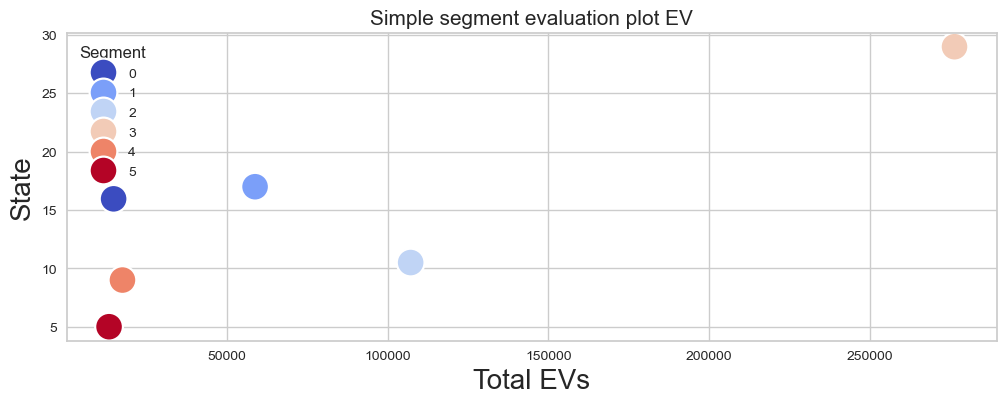

In [288]:
segment = four_wheeler.merge(total, on='Cluster Number', how='left').merge(state, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="Grand Total", y="State Name", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot EV", fontsize=15)
plt.xlabel("Total EVs", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.legend(title='Segment')
plt.show()

Karnataka states has higher number of 4 Wheeler EVs and most of the states have less than 5000 EVs.

   Cluster Number    Grand Total  total-charging-stations  State Name
0               0   14844.692308                     28.0   15.961538
1               1   58815.000000                    265.0   17.000000
2               2  107174.000000                    156.5   10.500000
3               3  276217.000000                     87.0   29.000000
4               4   17593.000000                     78.0    9.000000
5               5   13428.000000                     18.0    5.000000


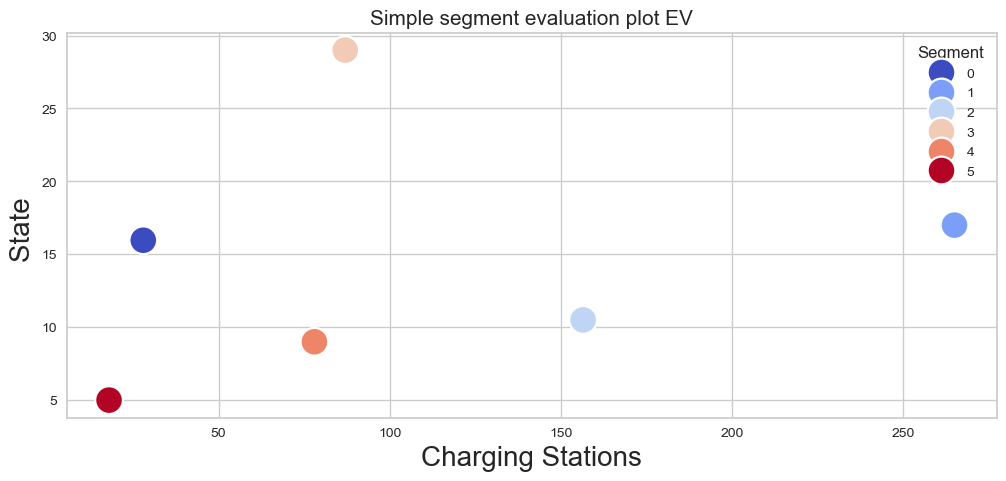

In [154]:
segment = total.merge(charging_stations, on='Cluster Number', how='left').merge(state, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,5))
sns.scatterplot(x="total-charging-stations", y="State Name", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot EV", fontsize=15)
plt.xlabel("Charging Stations", fontsize=20)
plt.ylabel("State ", fontsize=20)
plt.legend(title='Segment')
plt.show()

In [ ]:
Maharashtra, Tamil Nadu ,Delhi have the most EV charging stations.

# 